Import pandas and matplotlib to show the analysis using csv file generated.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

read csv file and print the data frame

In [ ]:
csv_path = '/home/piyush/Desktop/Study/Research Project/ClusterScheduler/gavel/analysis/output.csv'
df = pd.read_csv(csv_path)
df

perform query on data frame to select

/tmp/ipykernel_1012569/2405383204.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


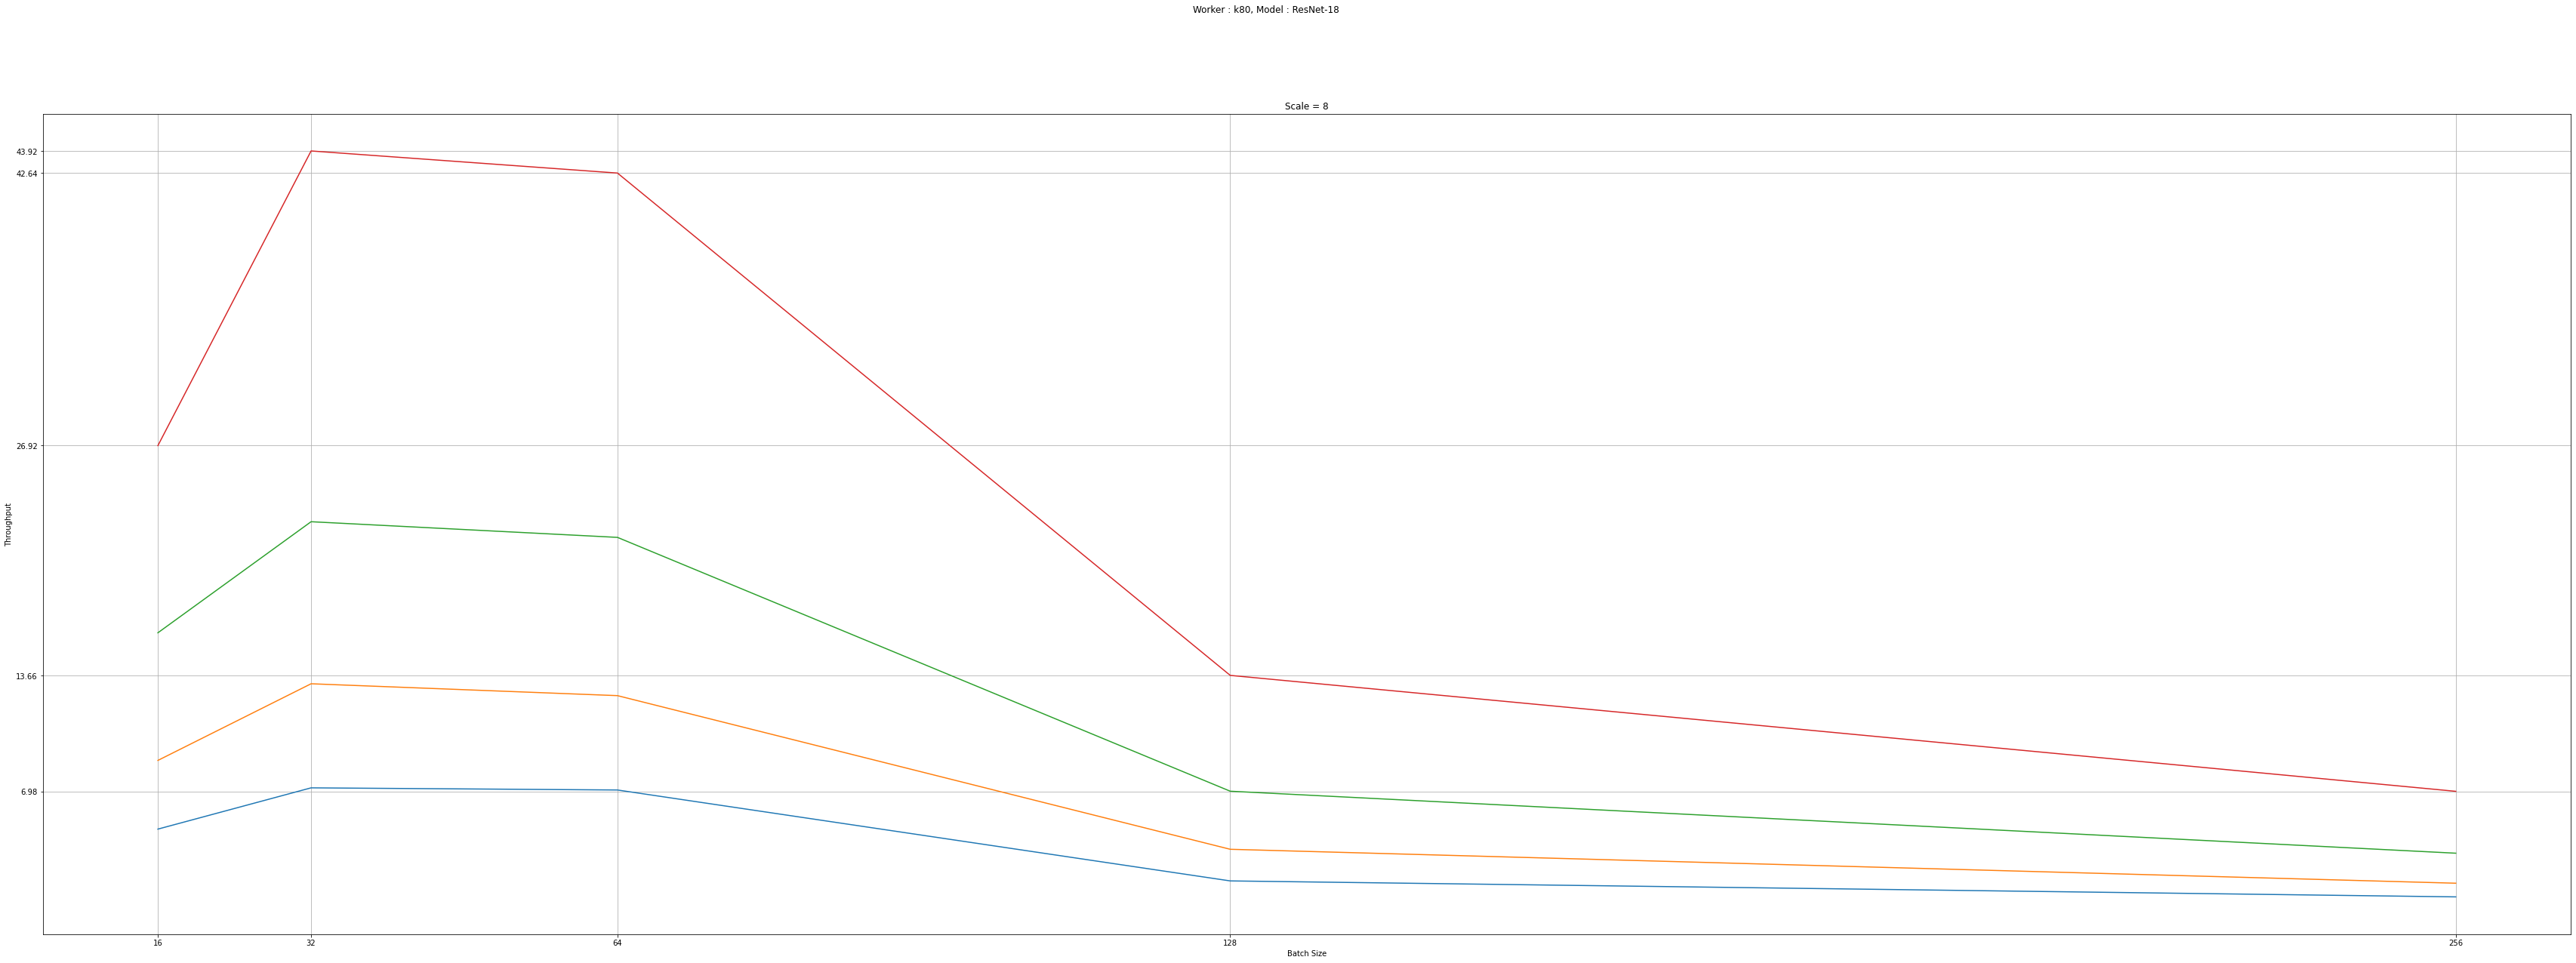

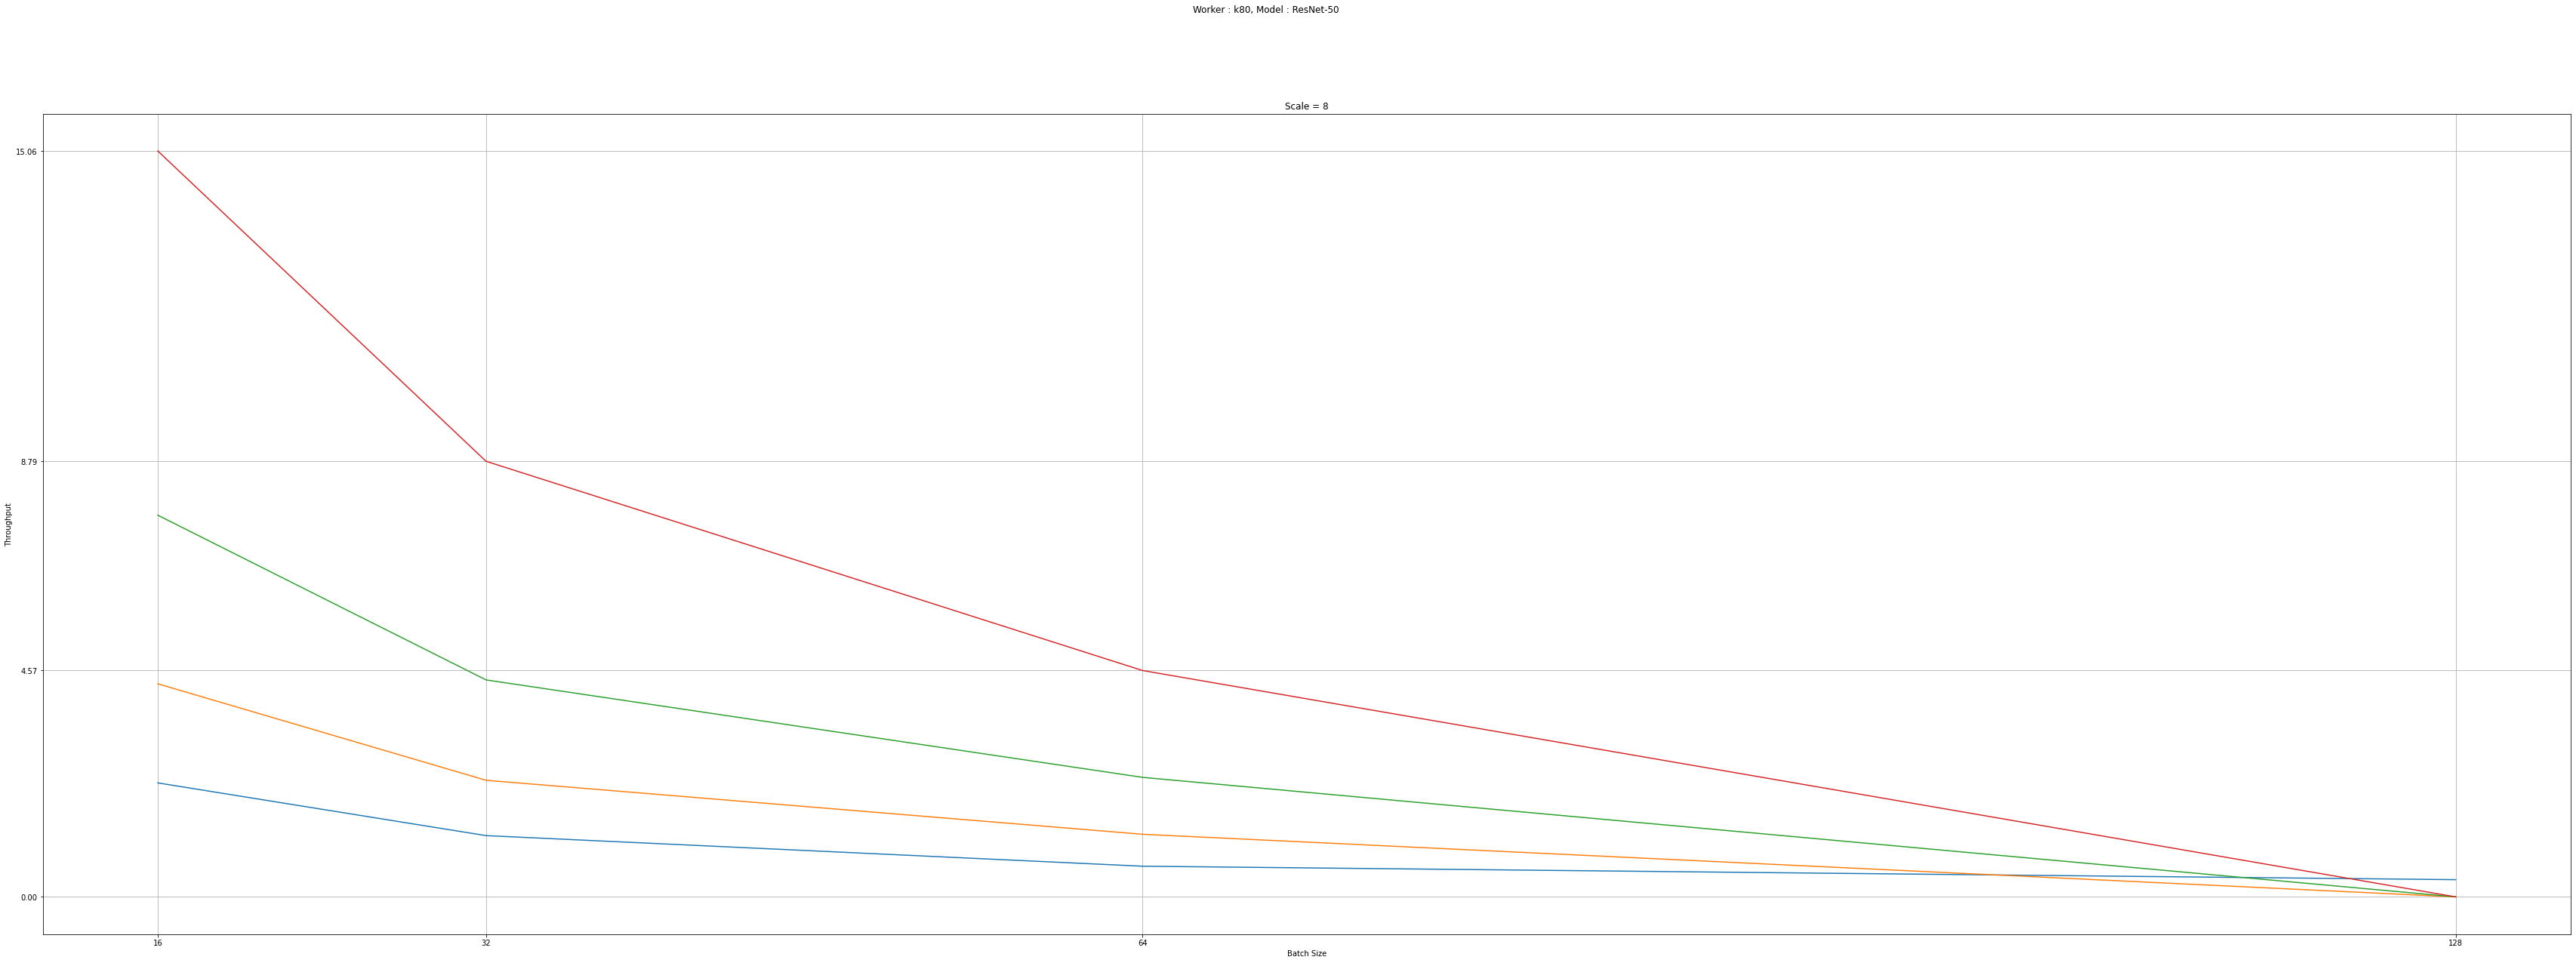

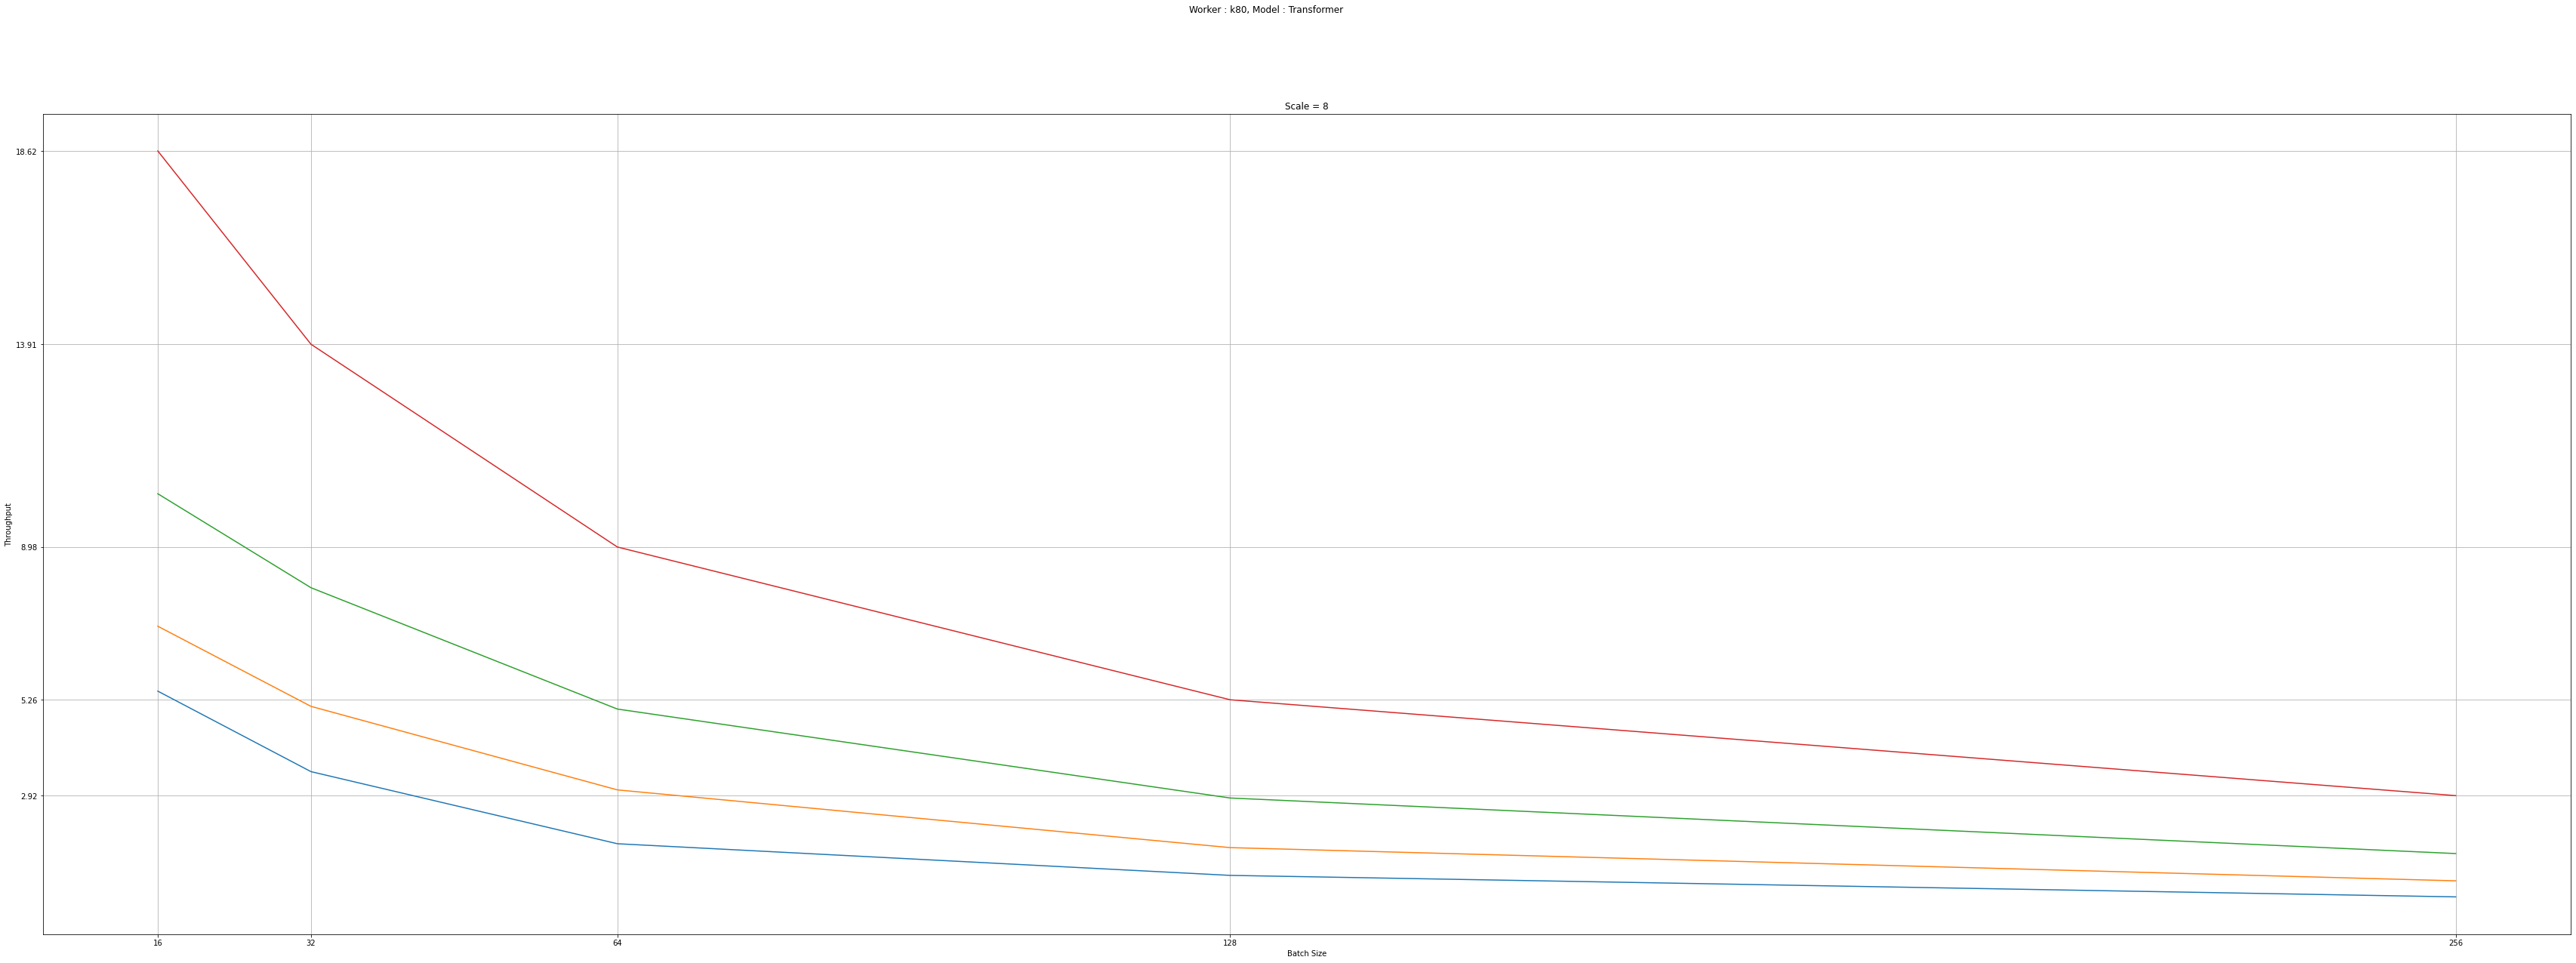

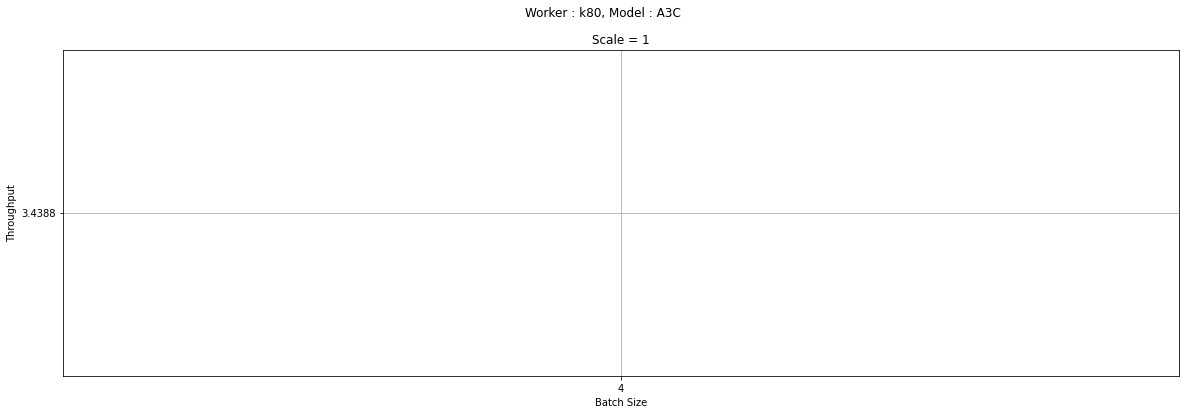

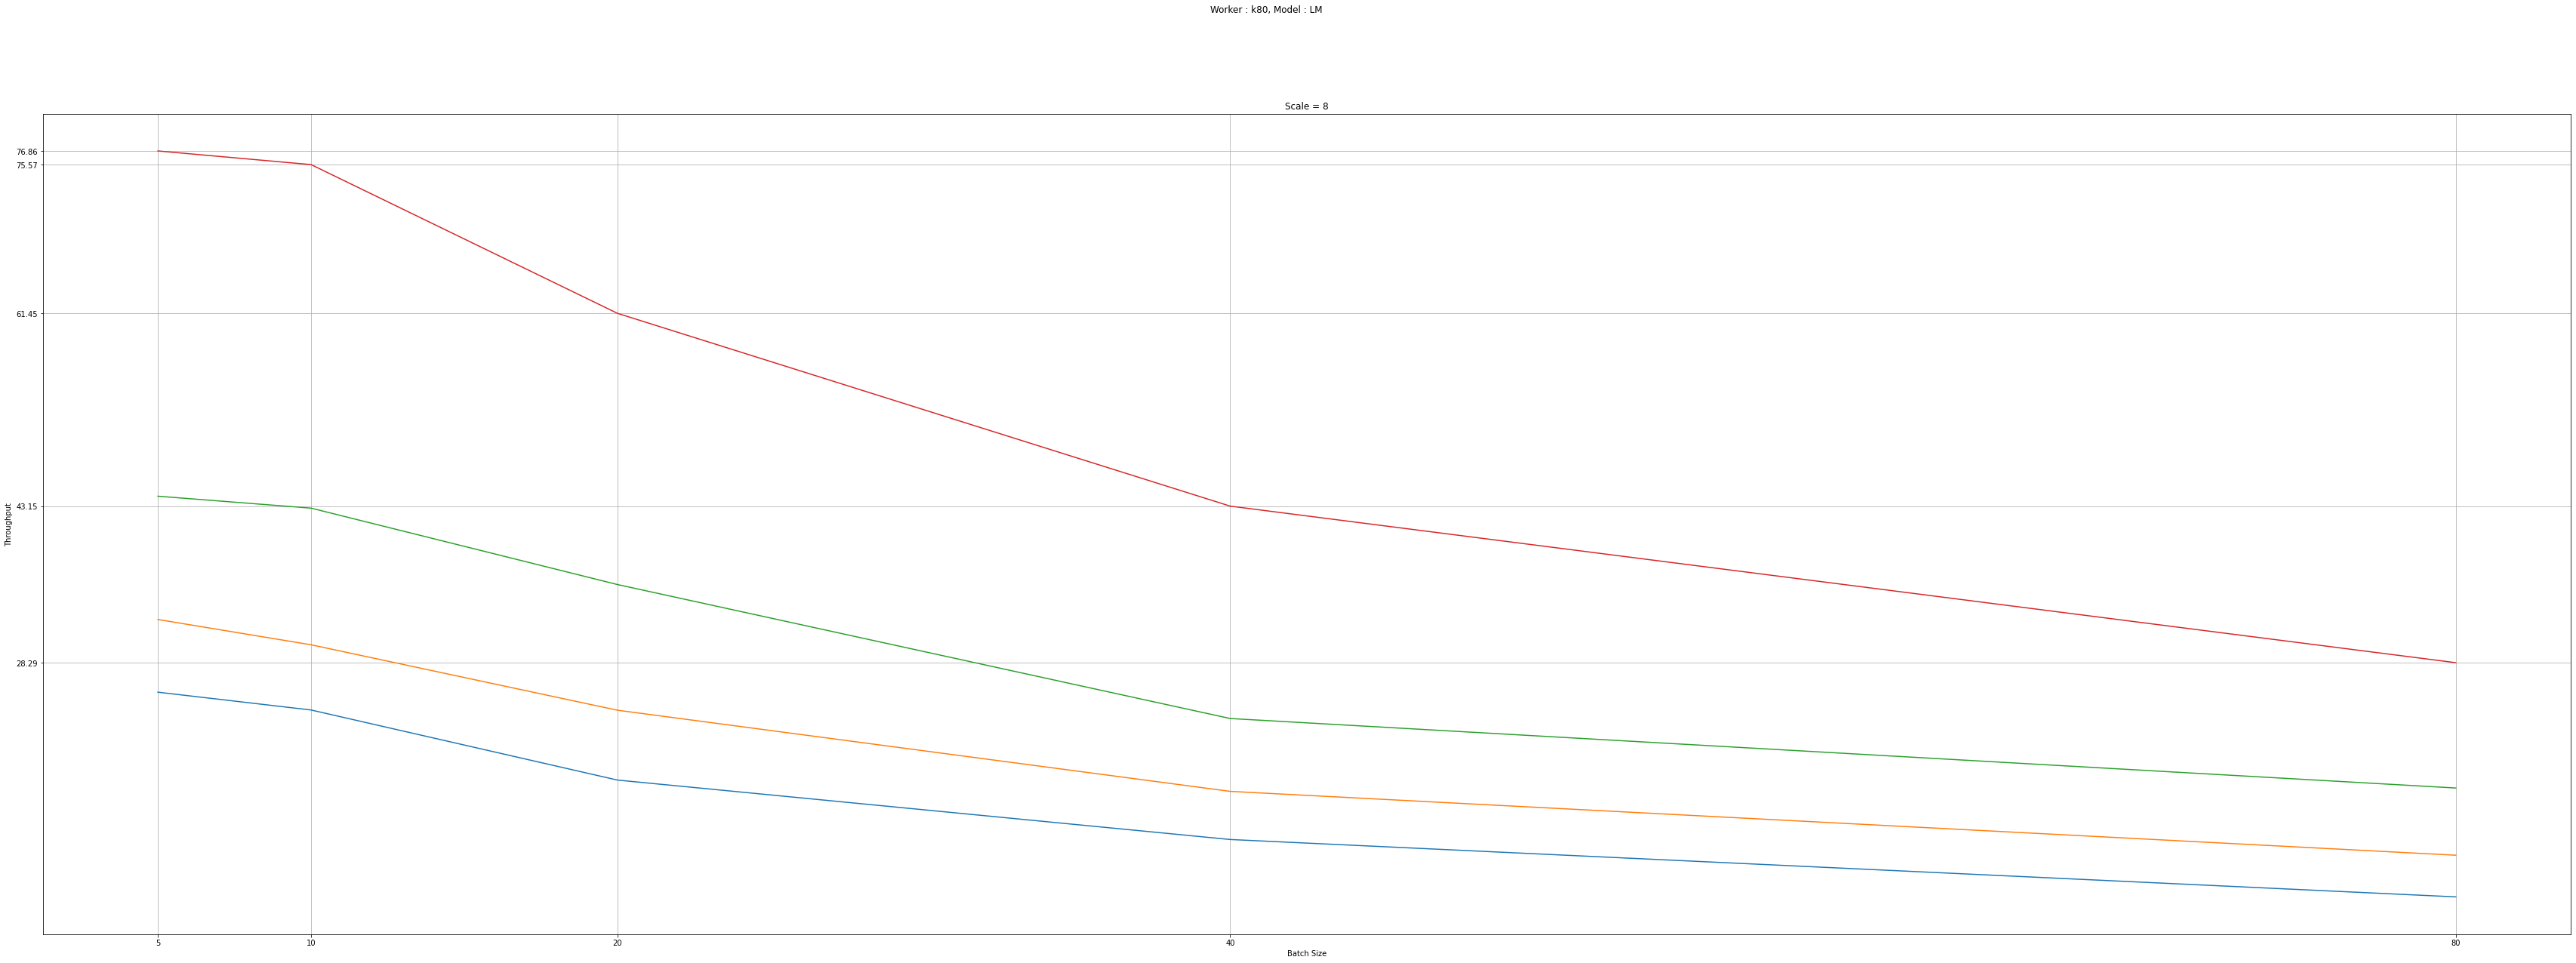

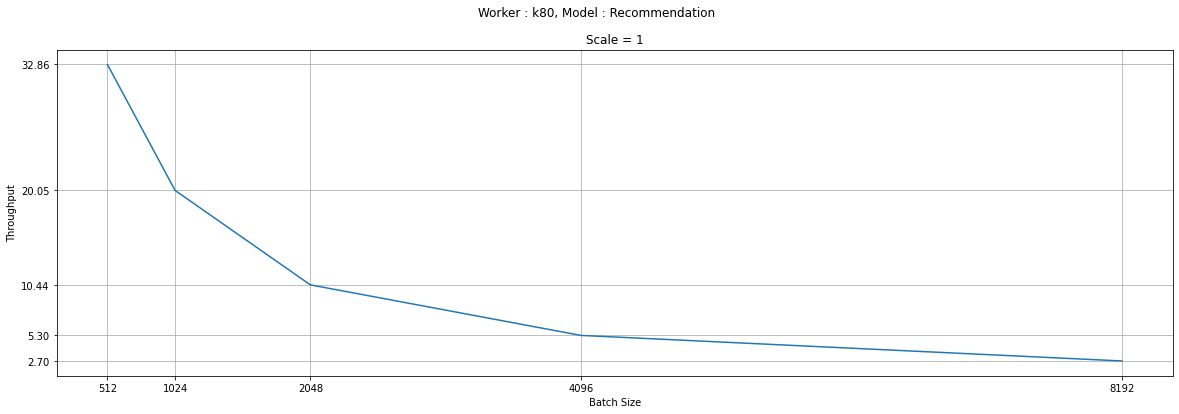

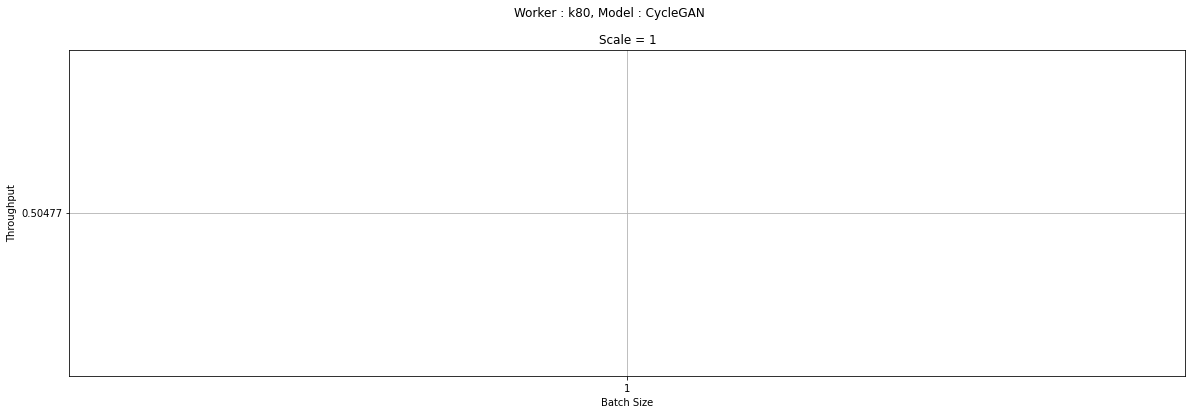

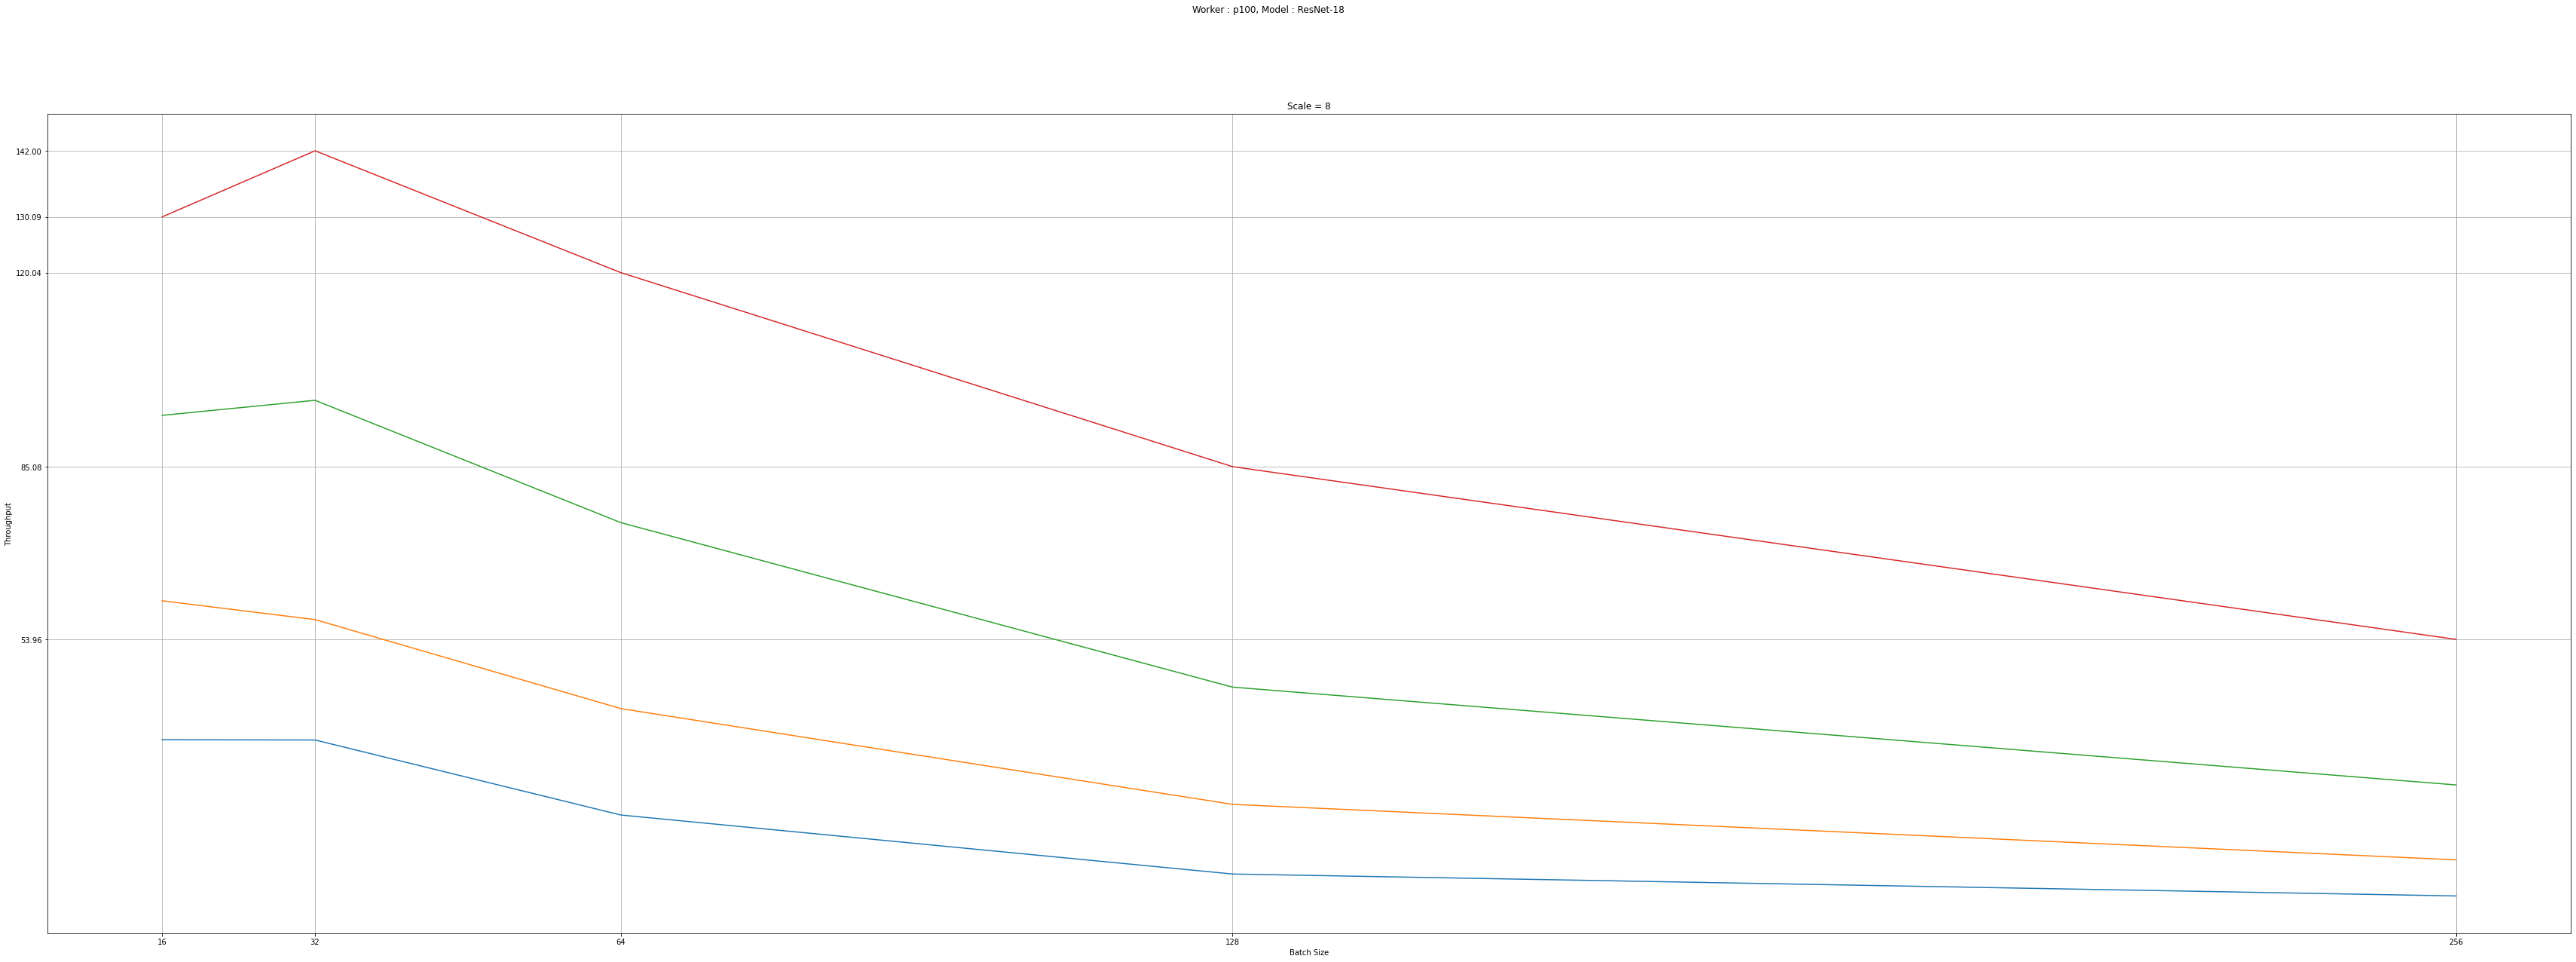

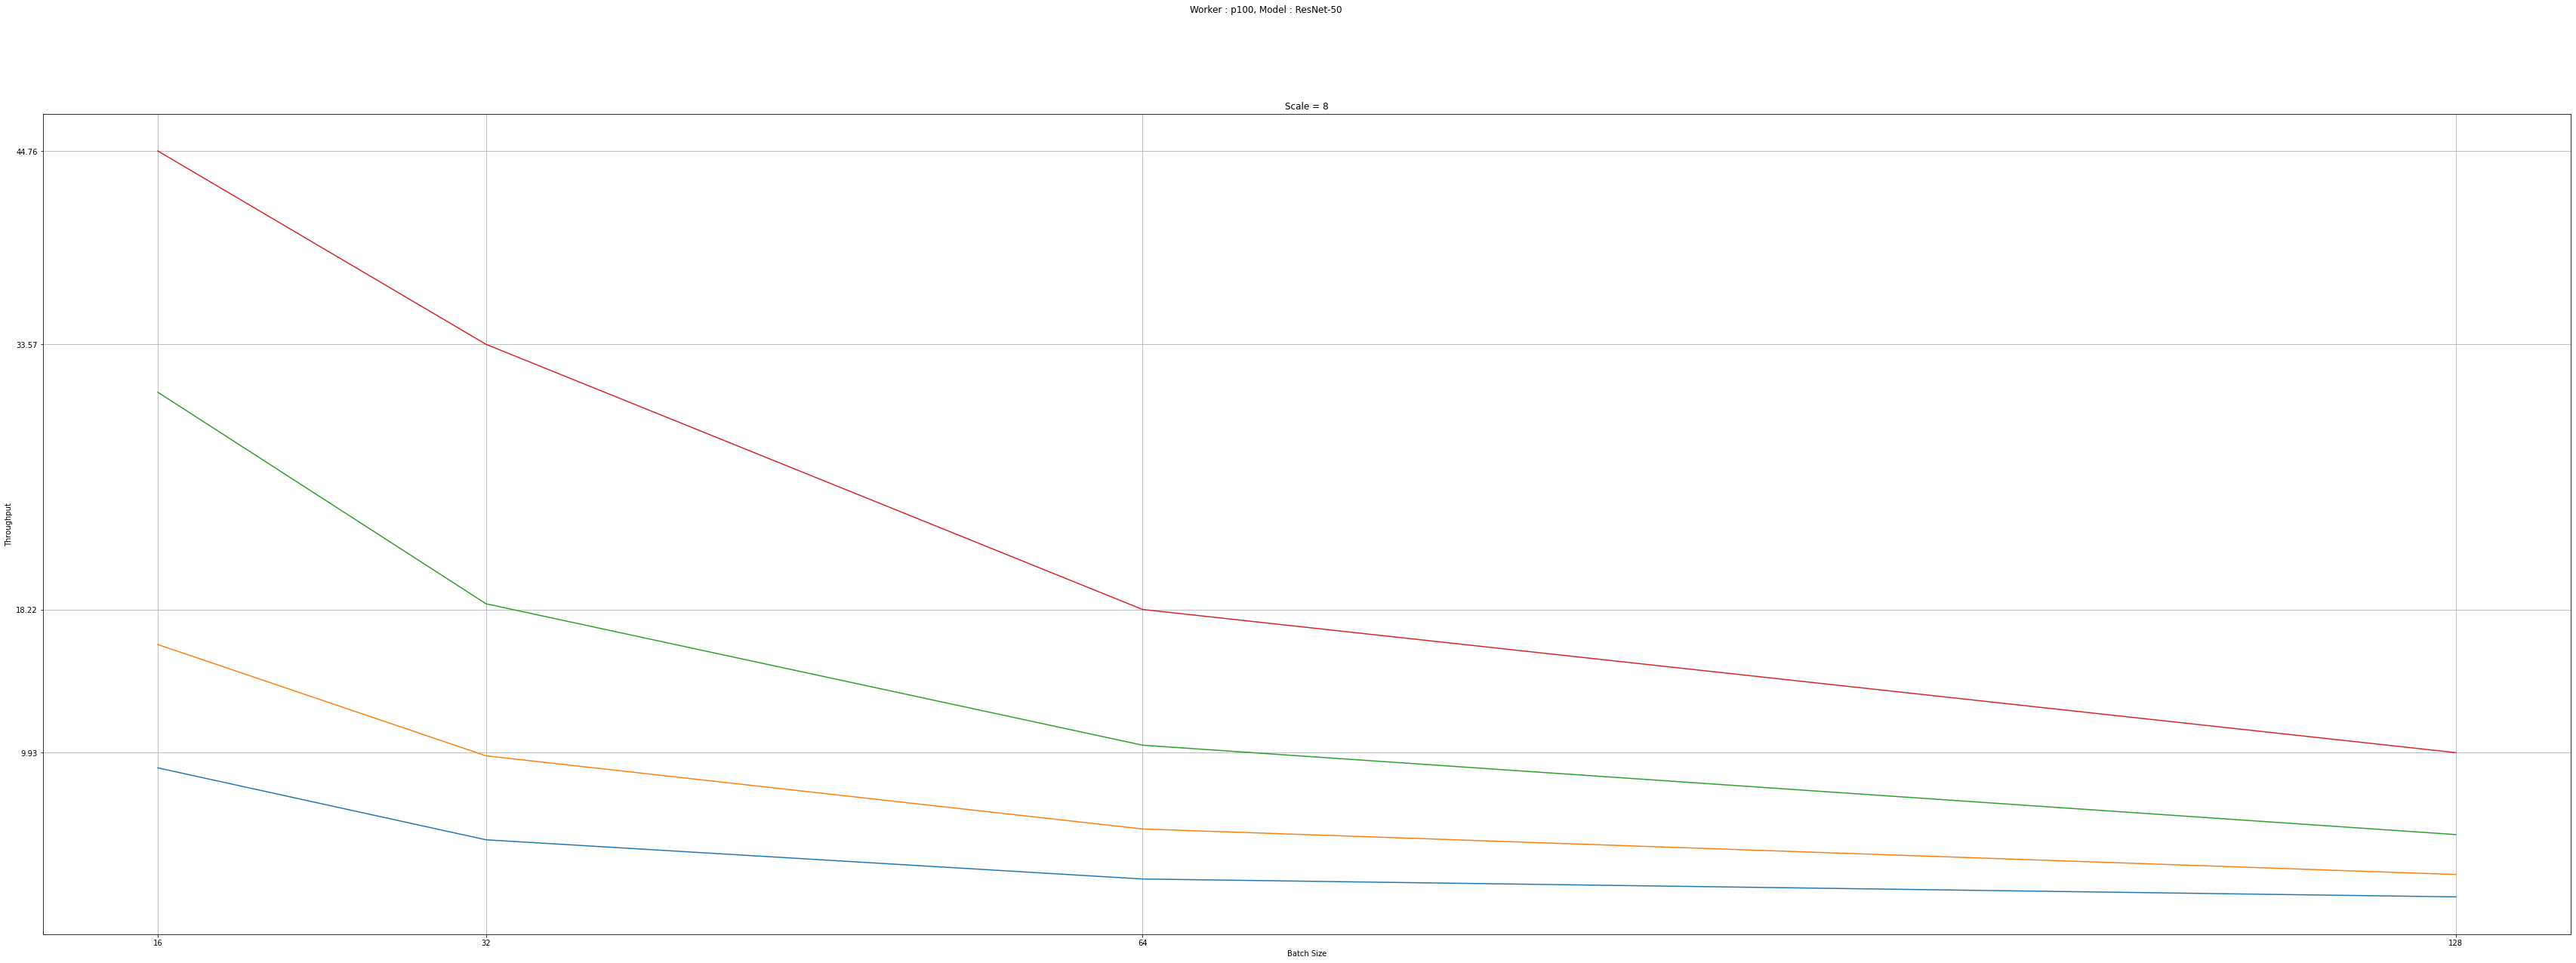

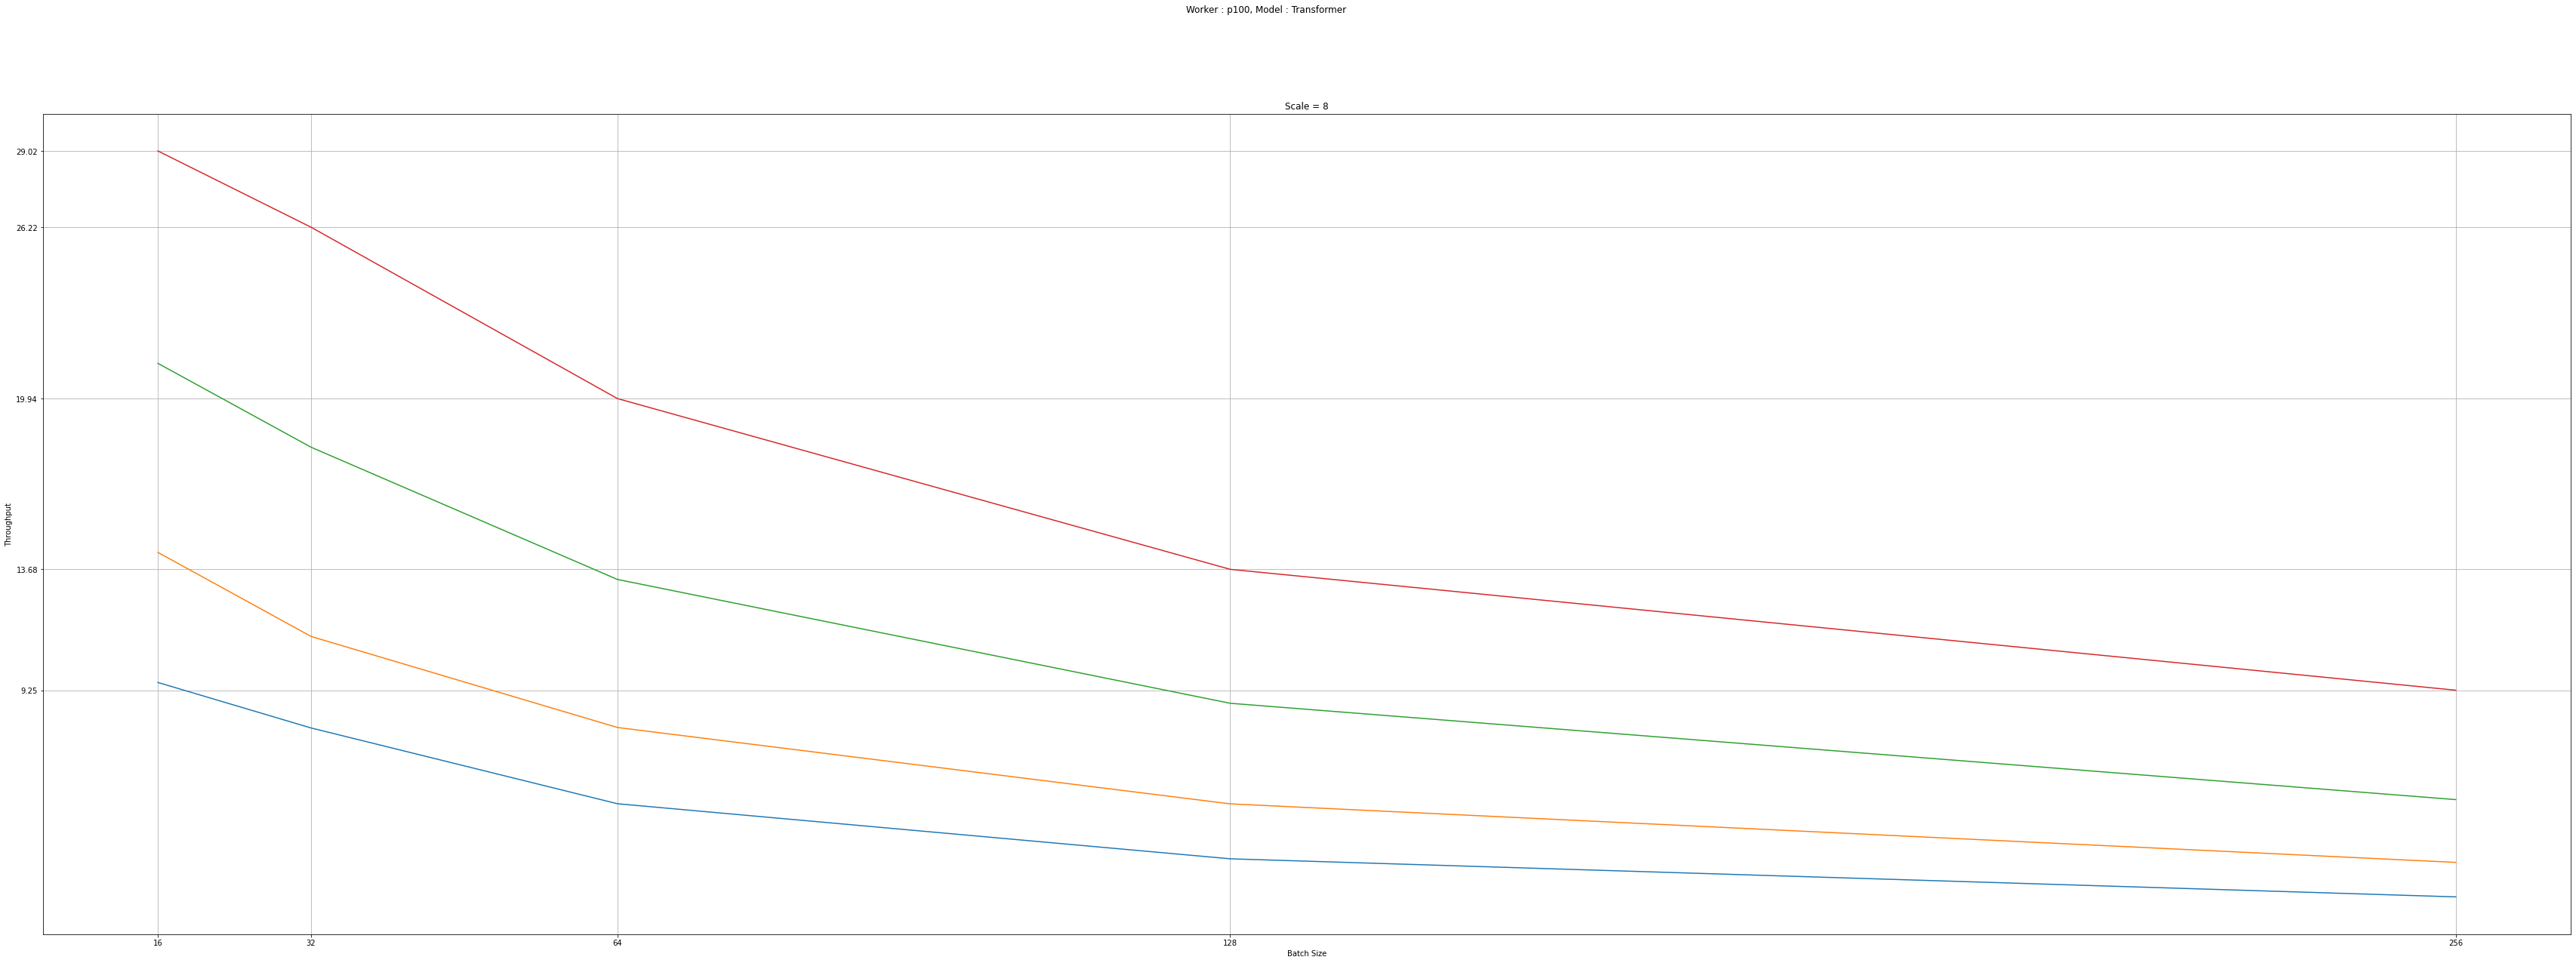

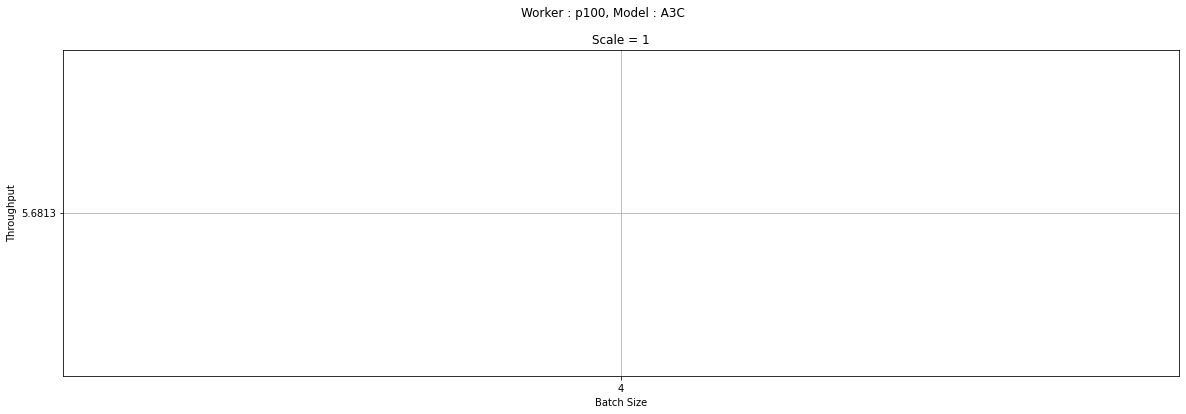

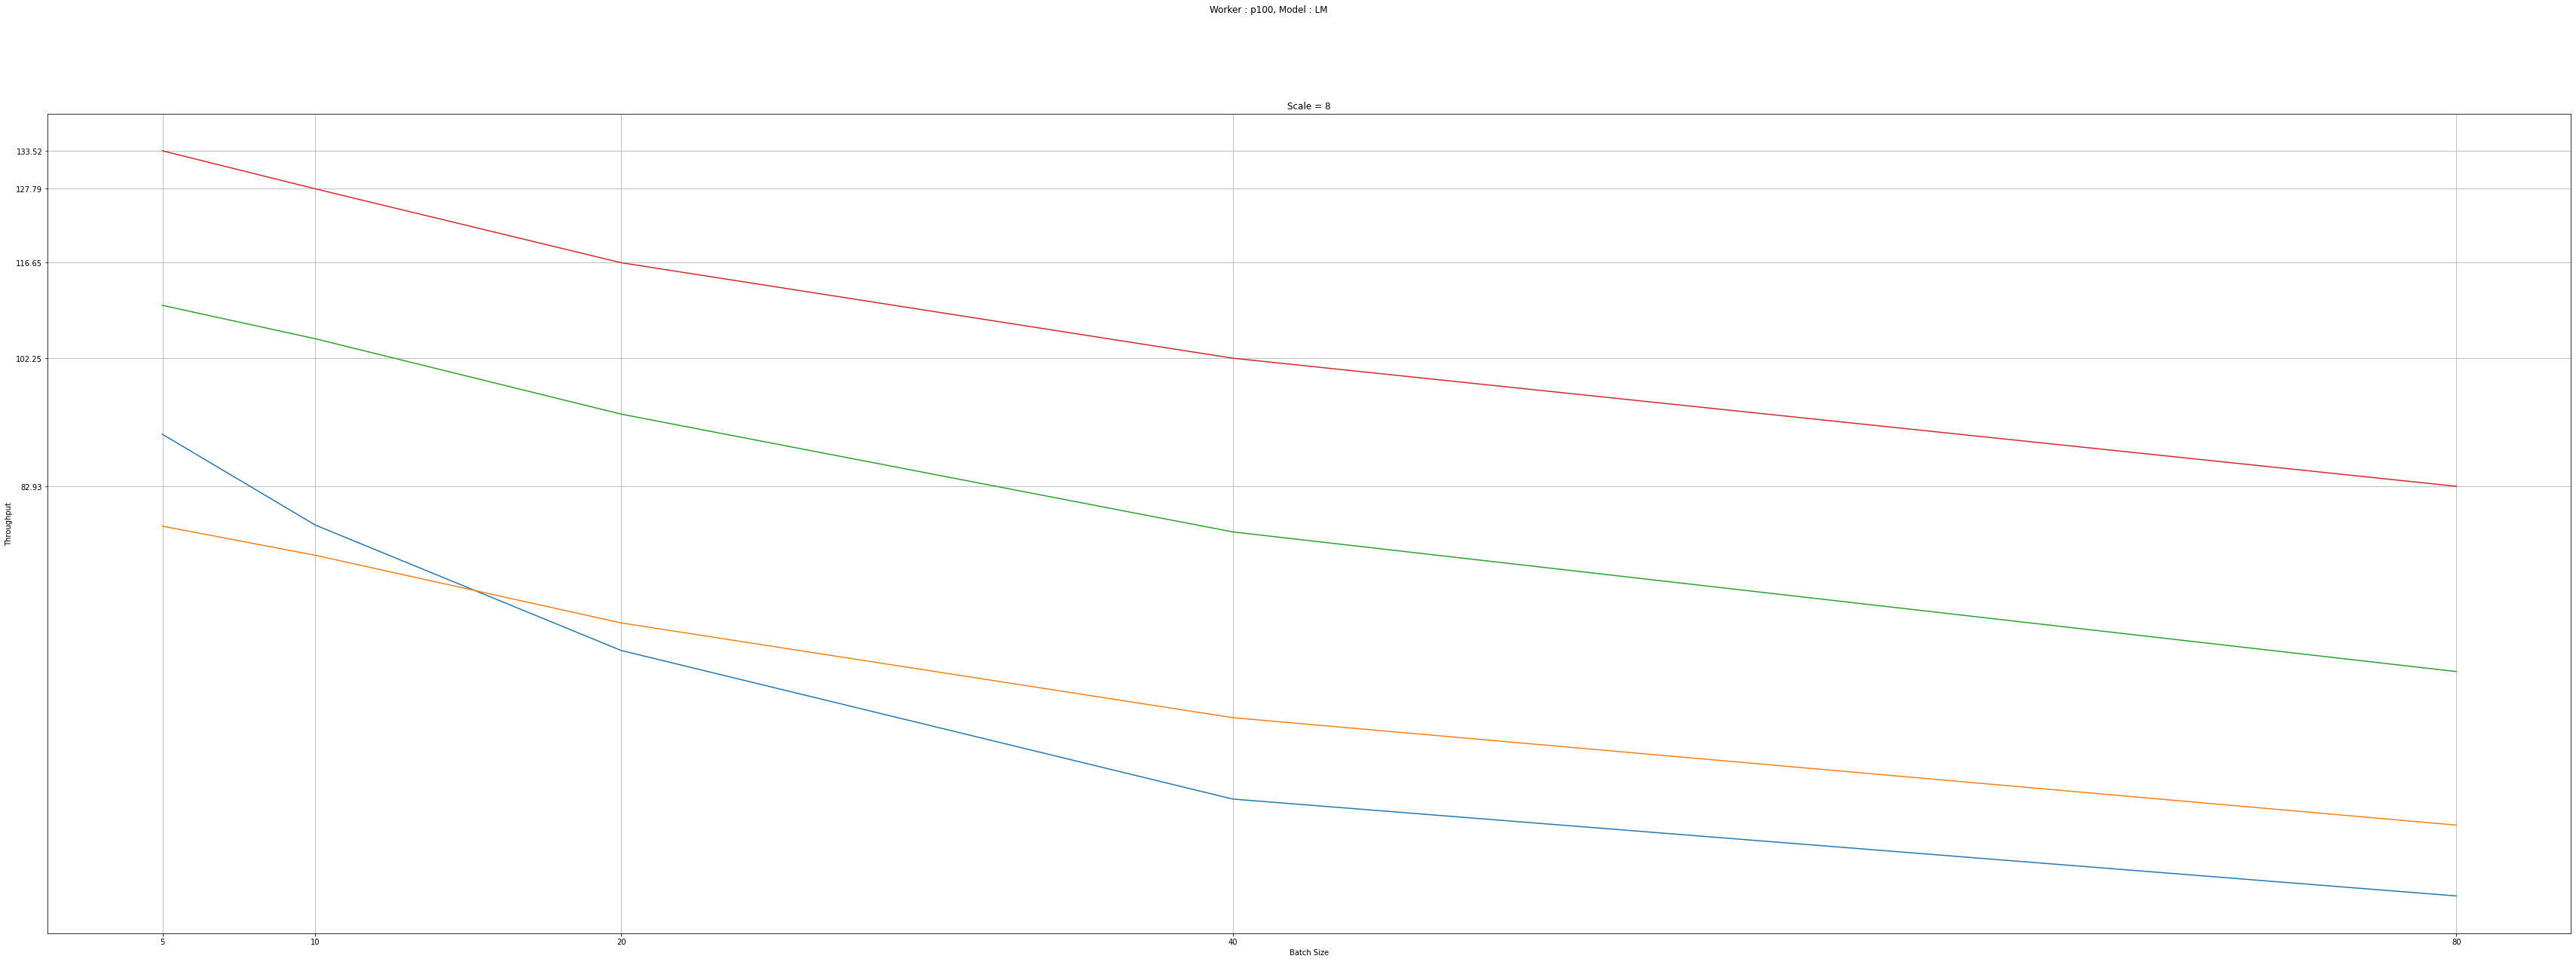

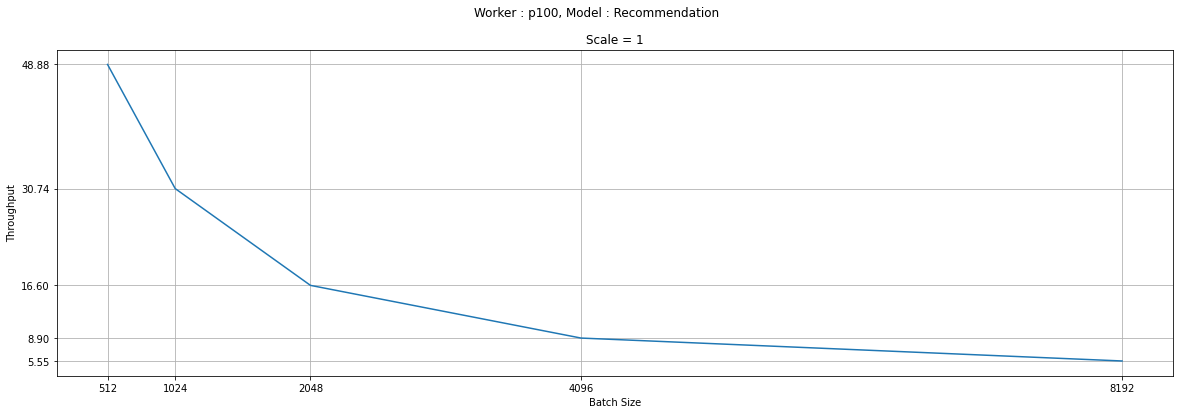

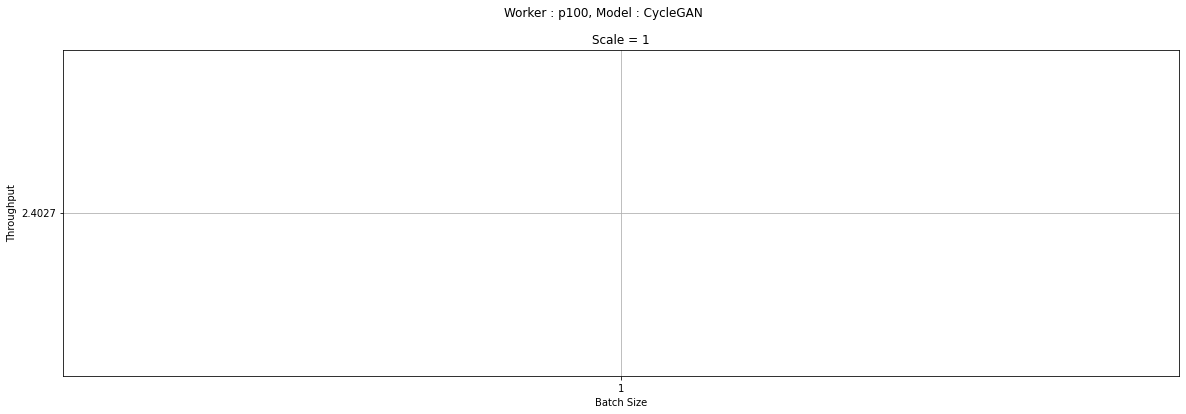

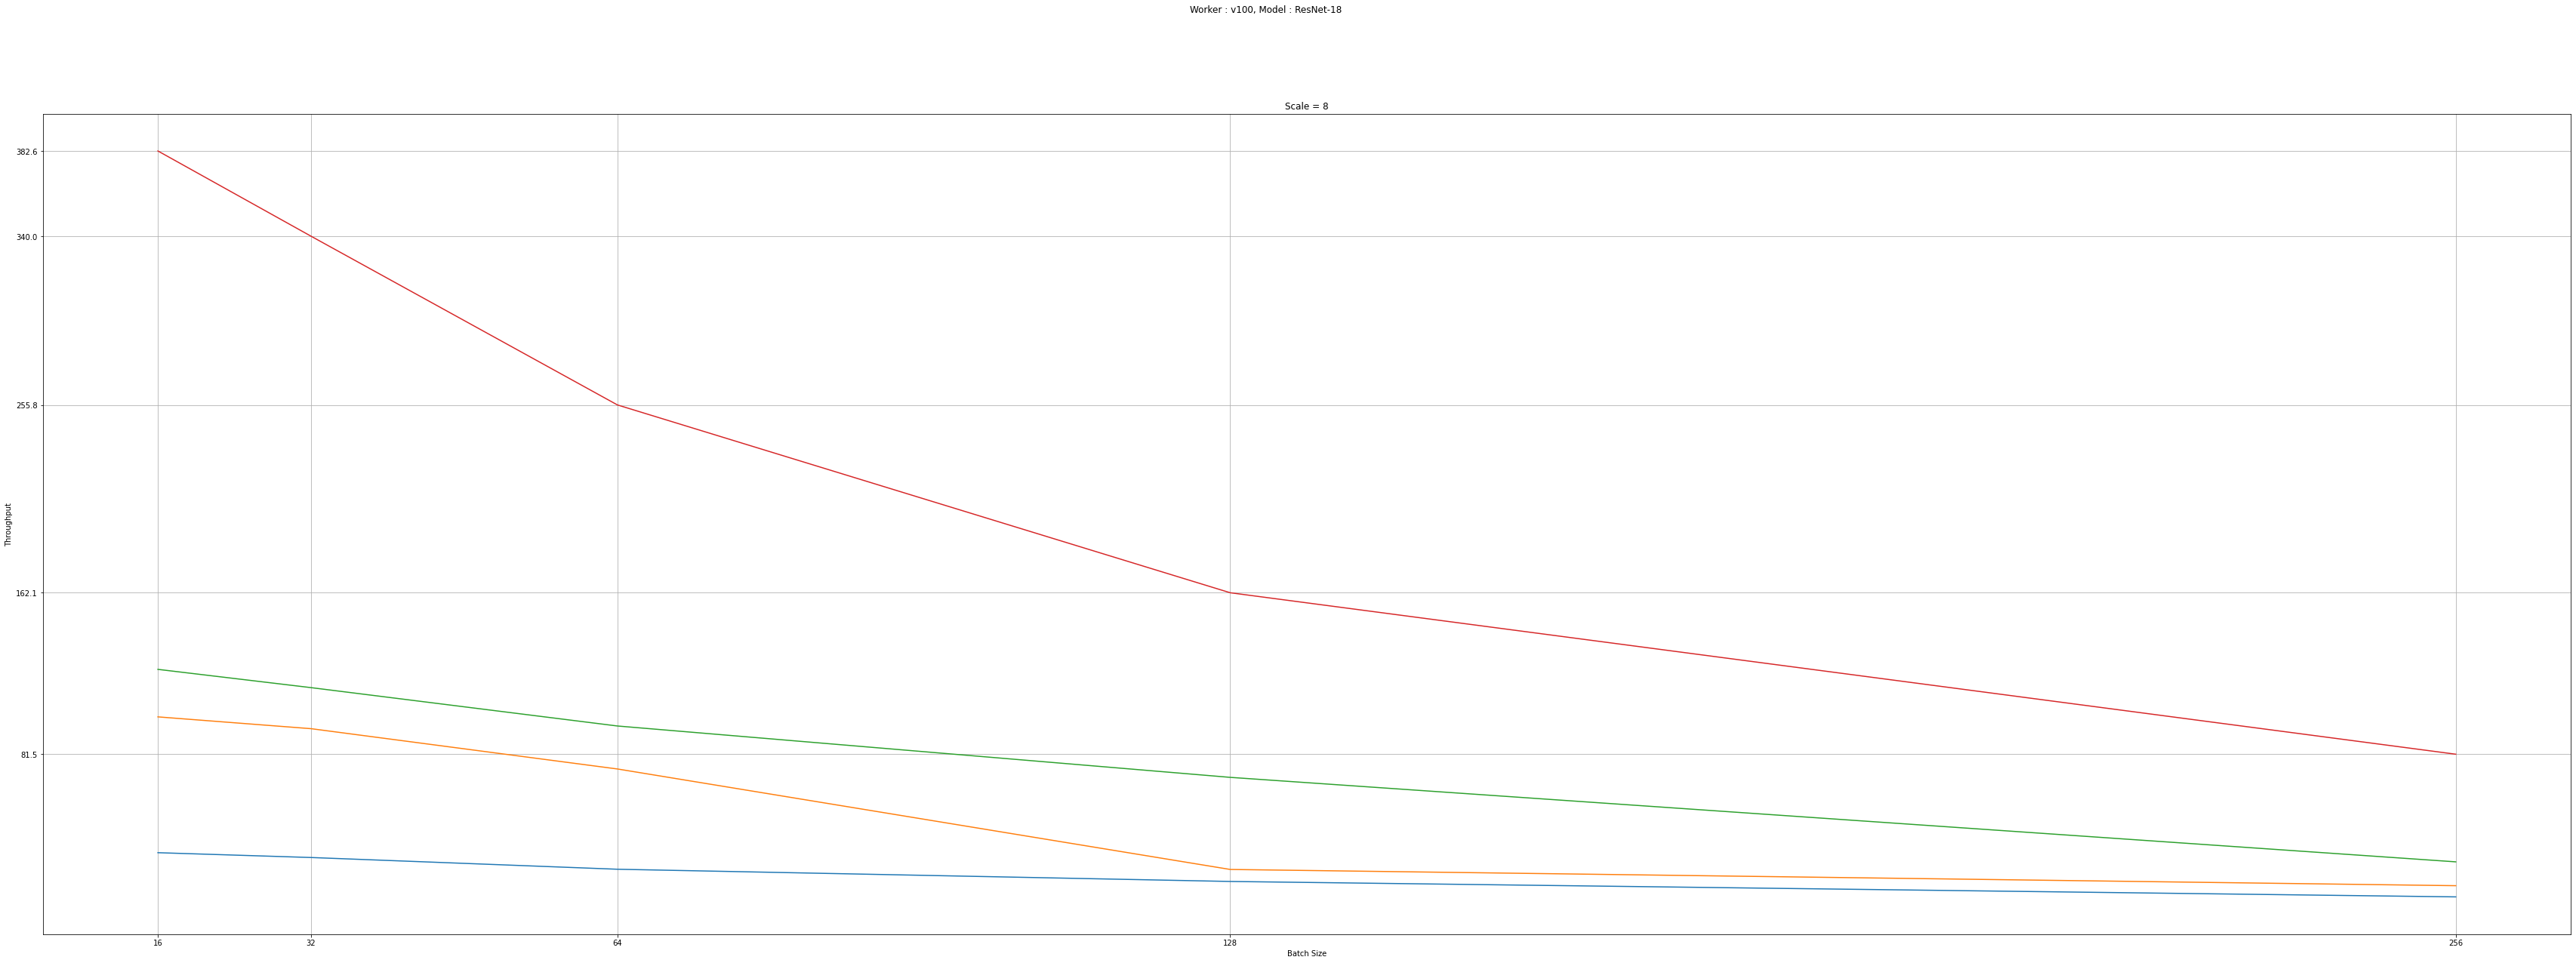

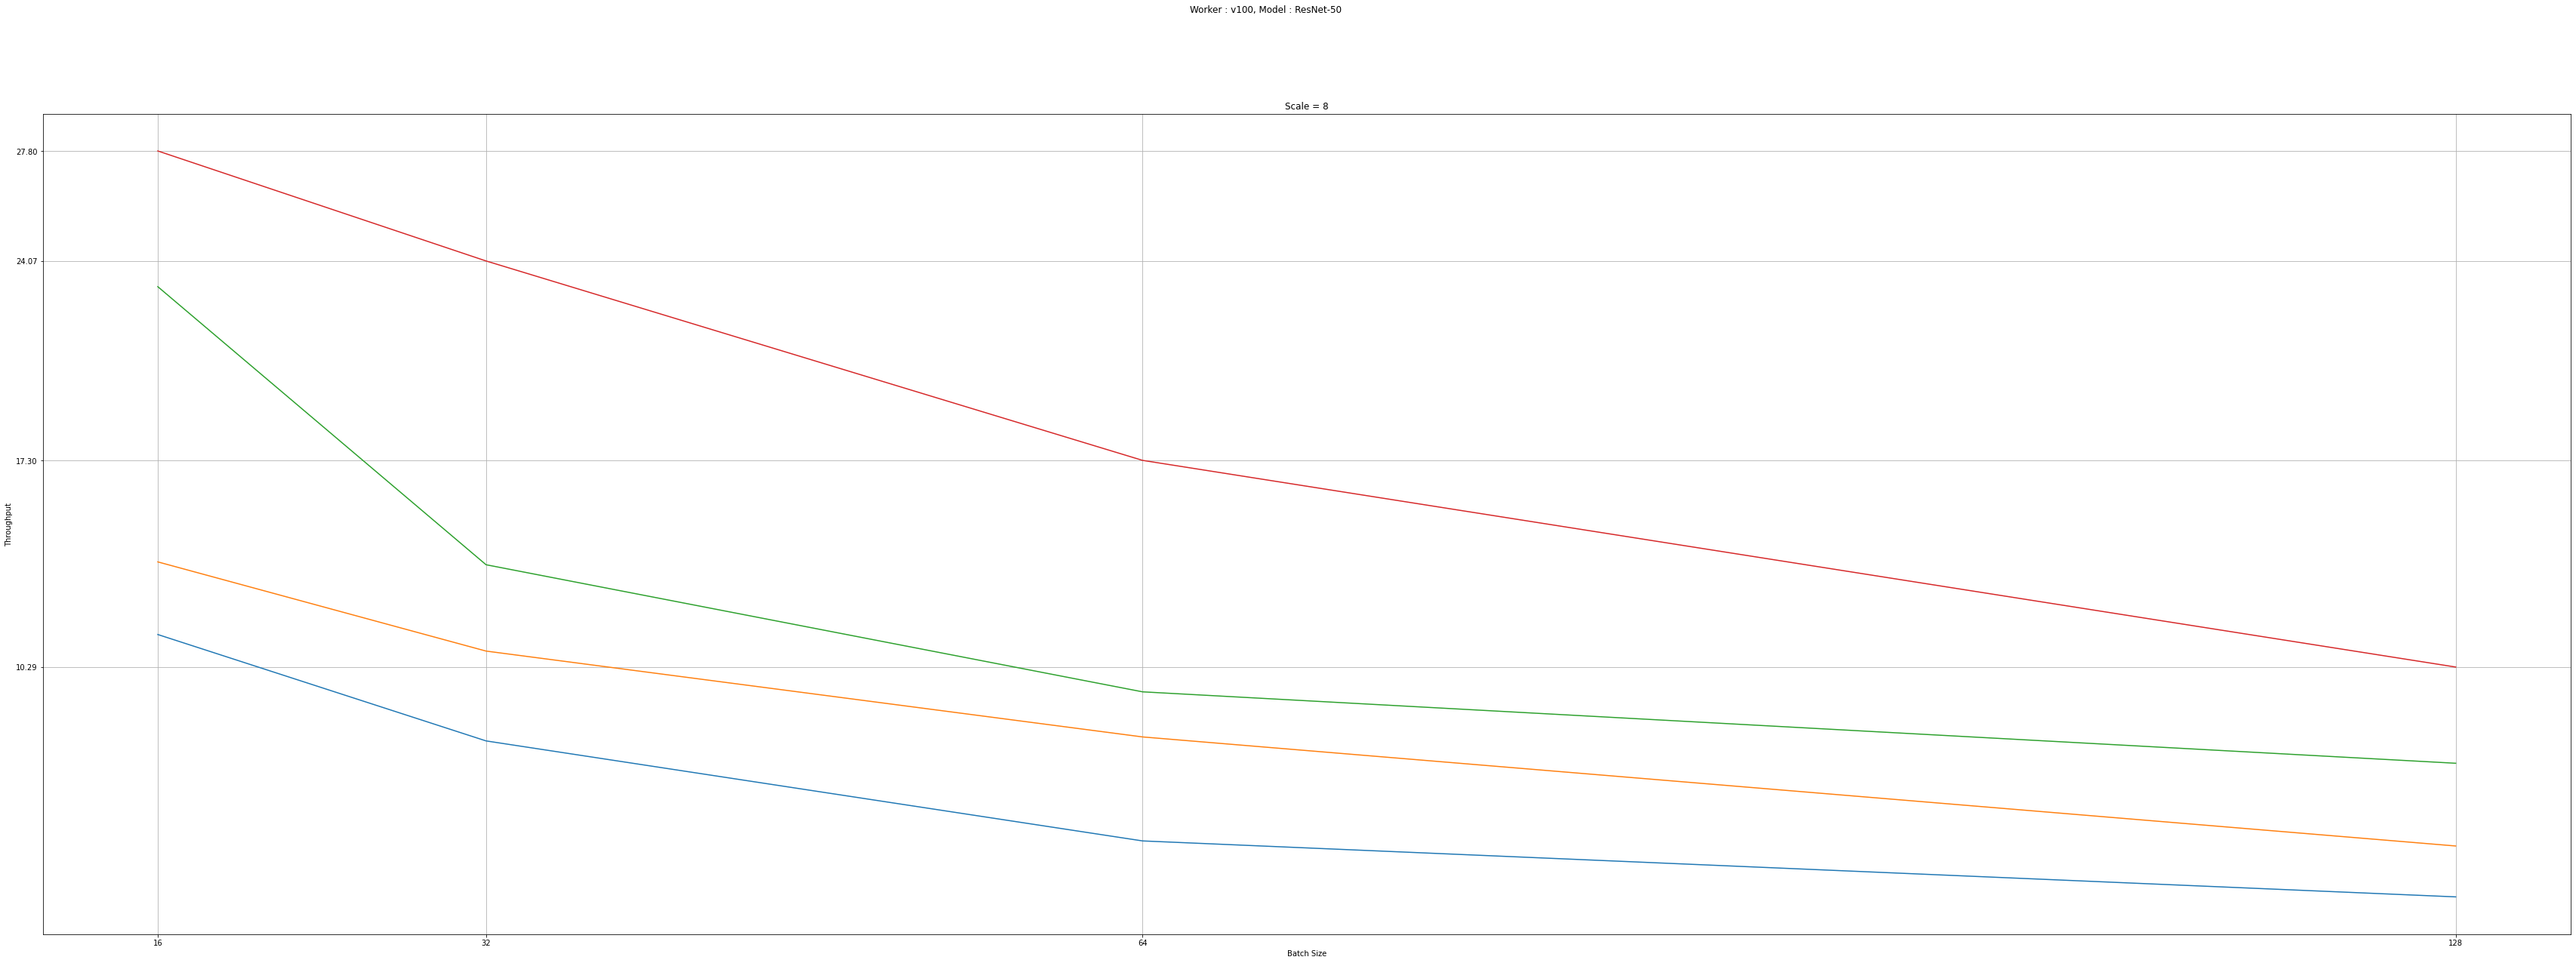

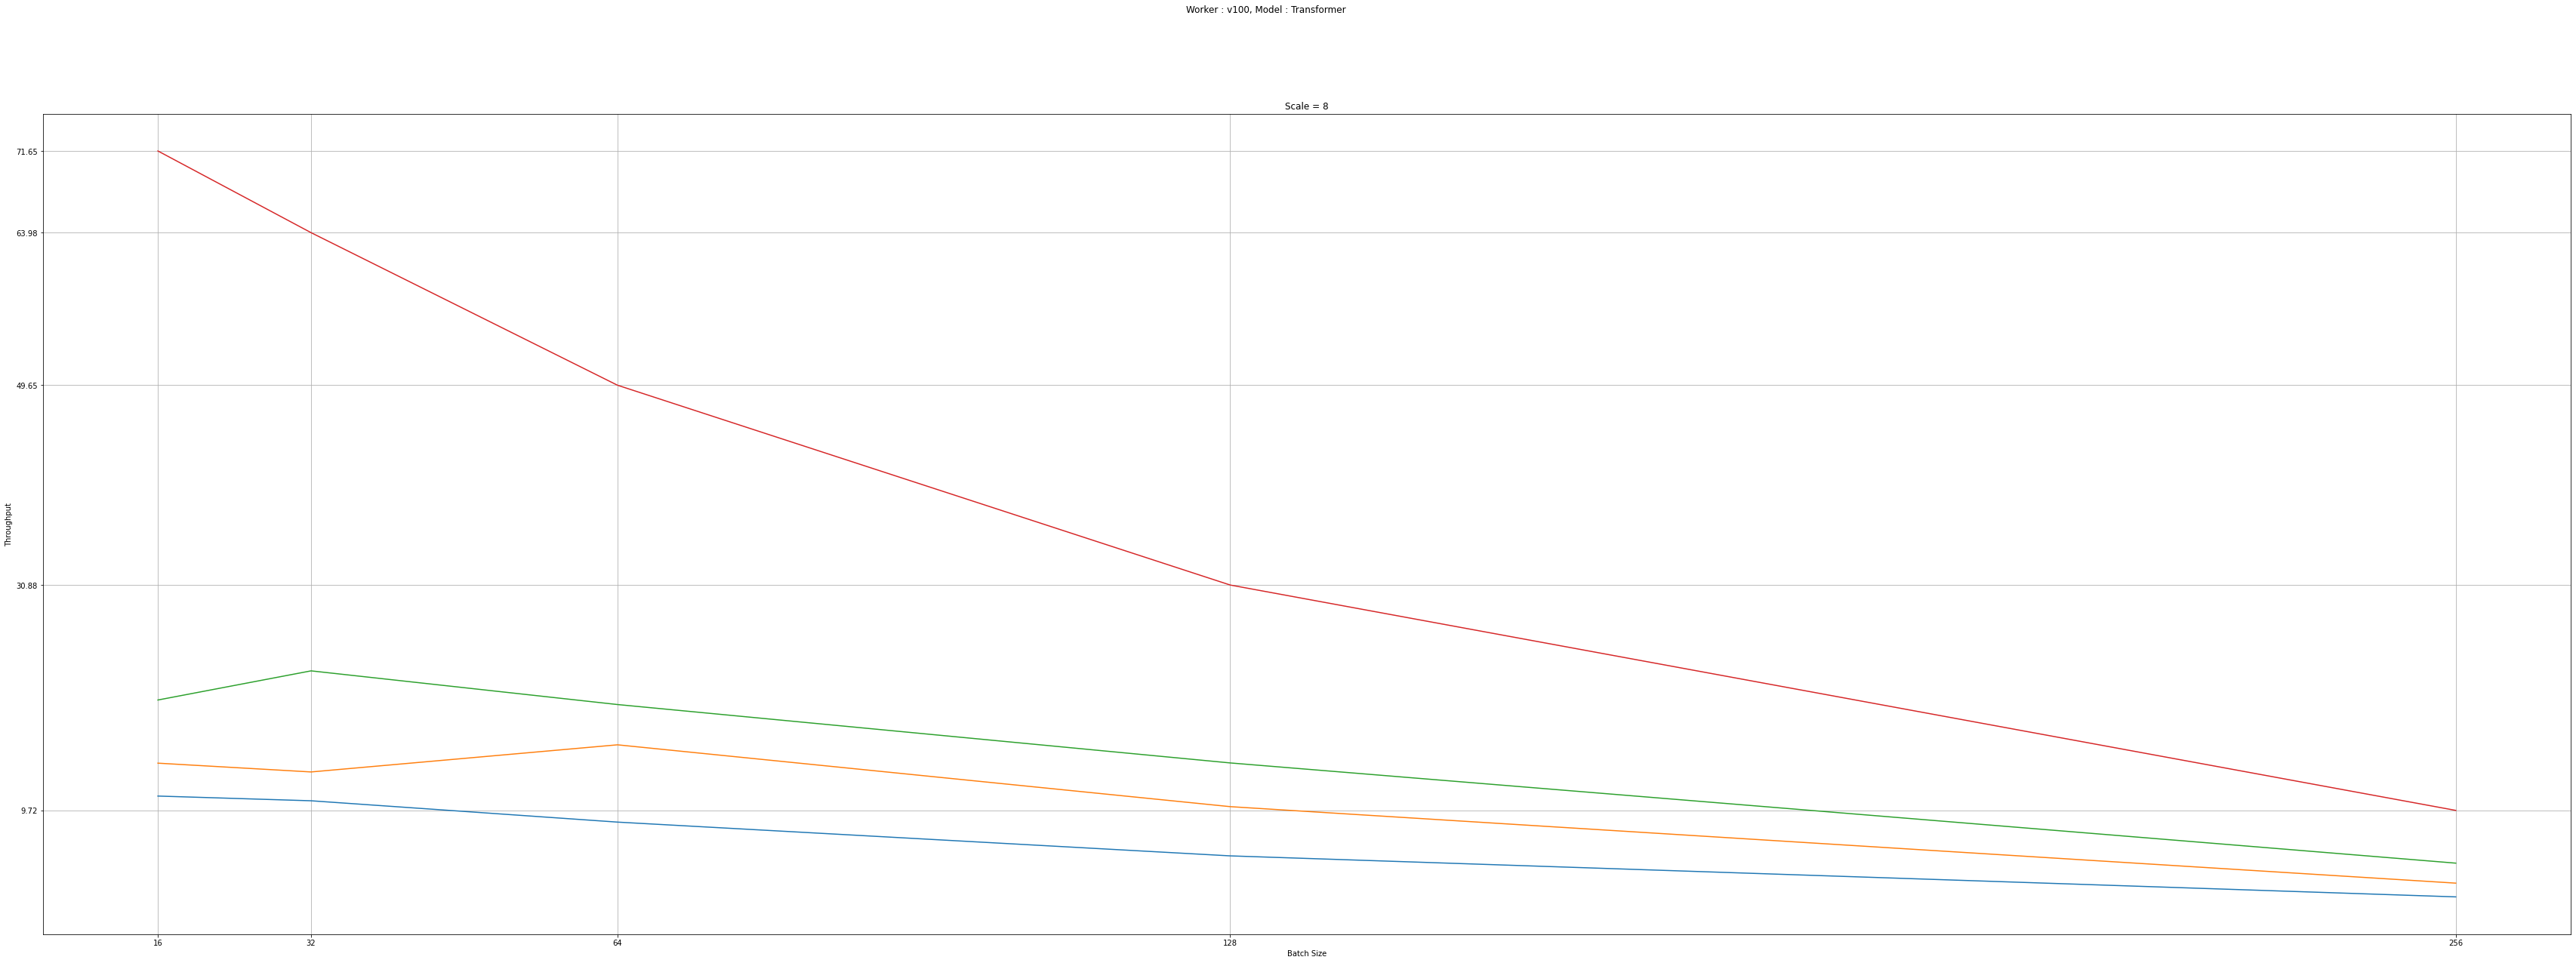

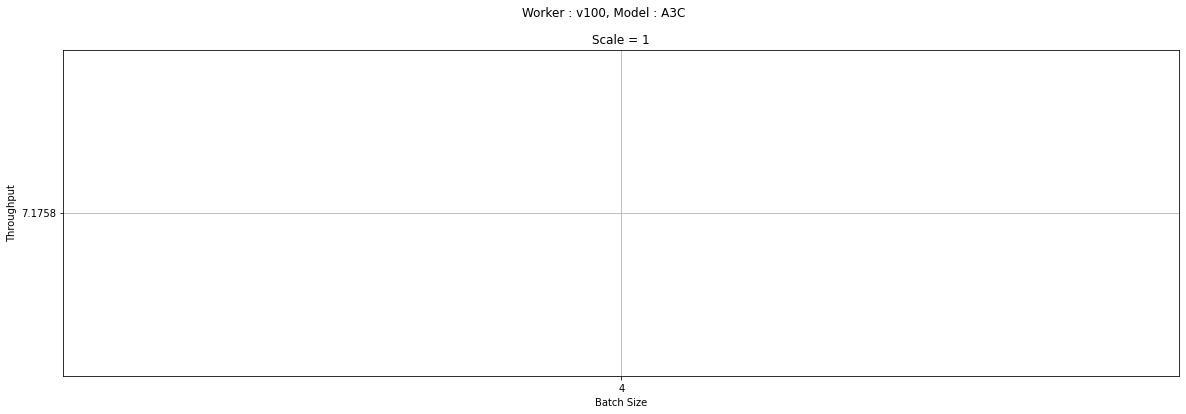

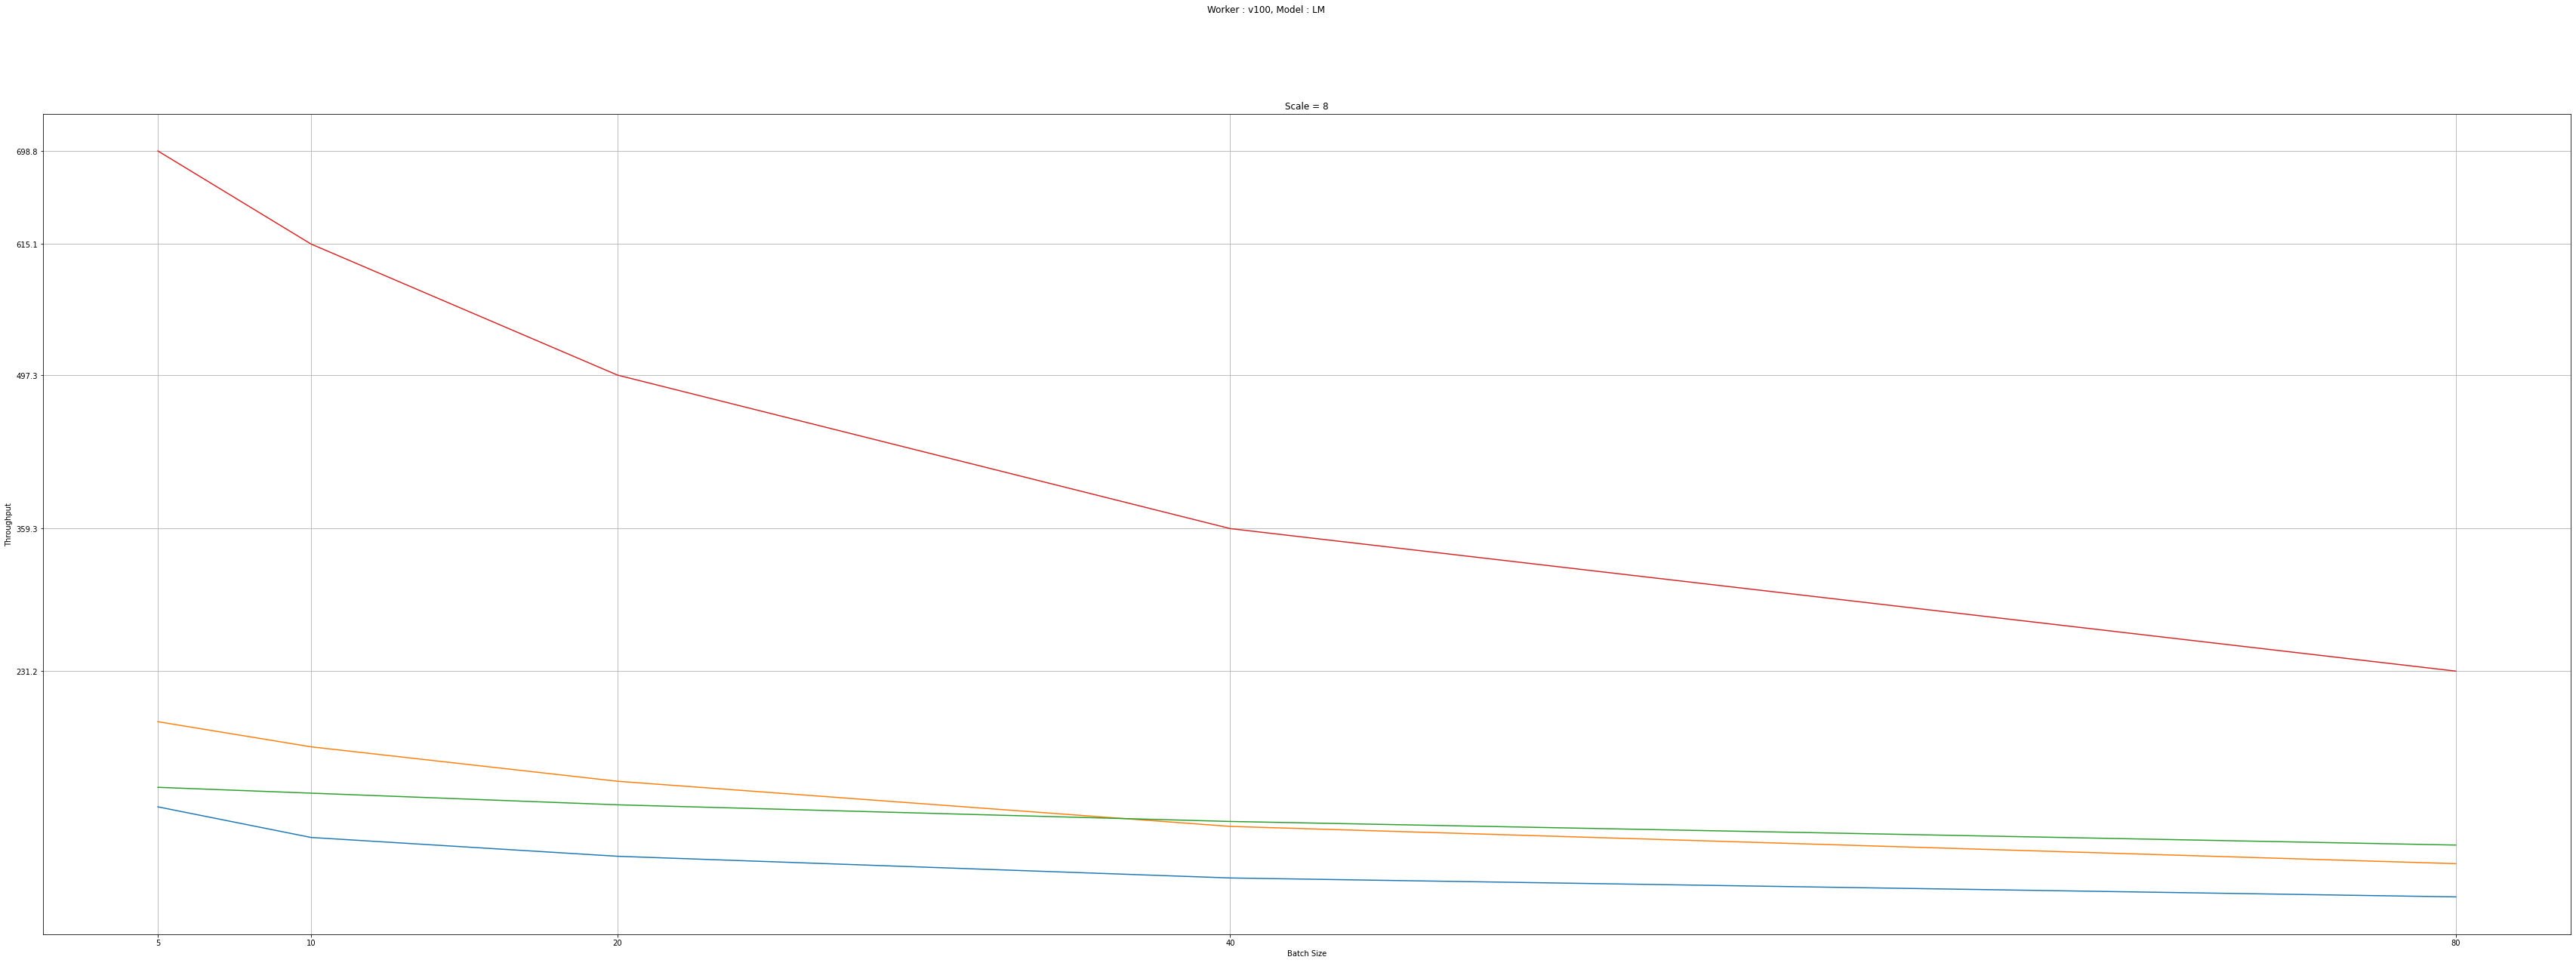

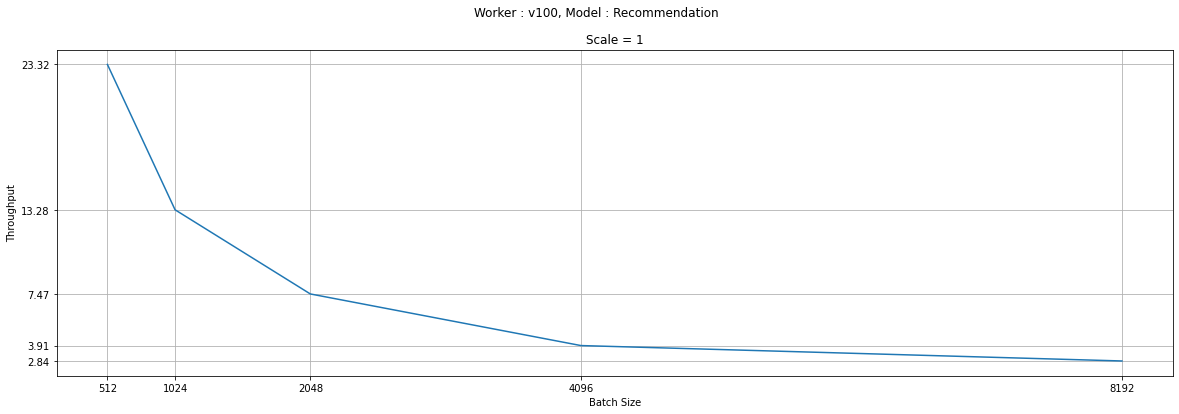

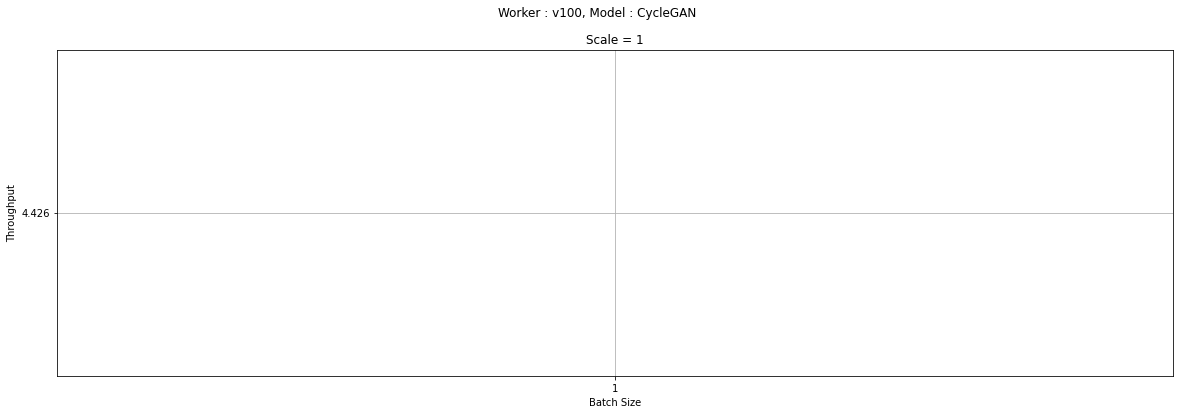

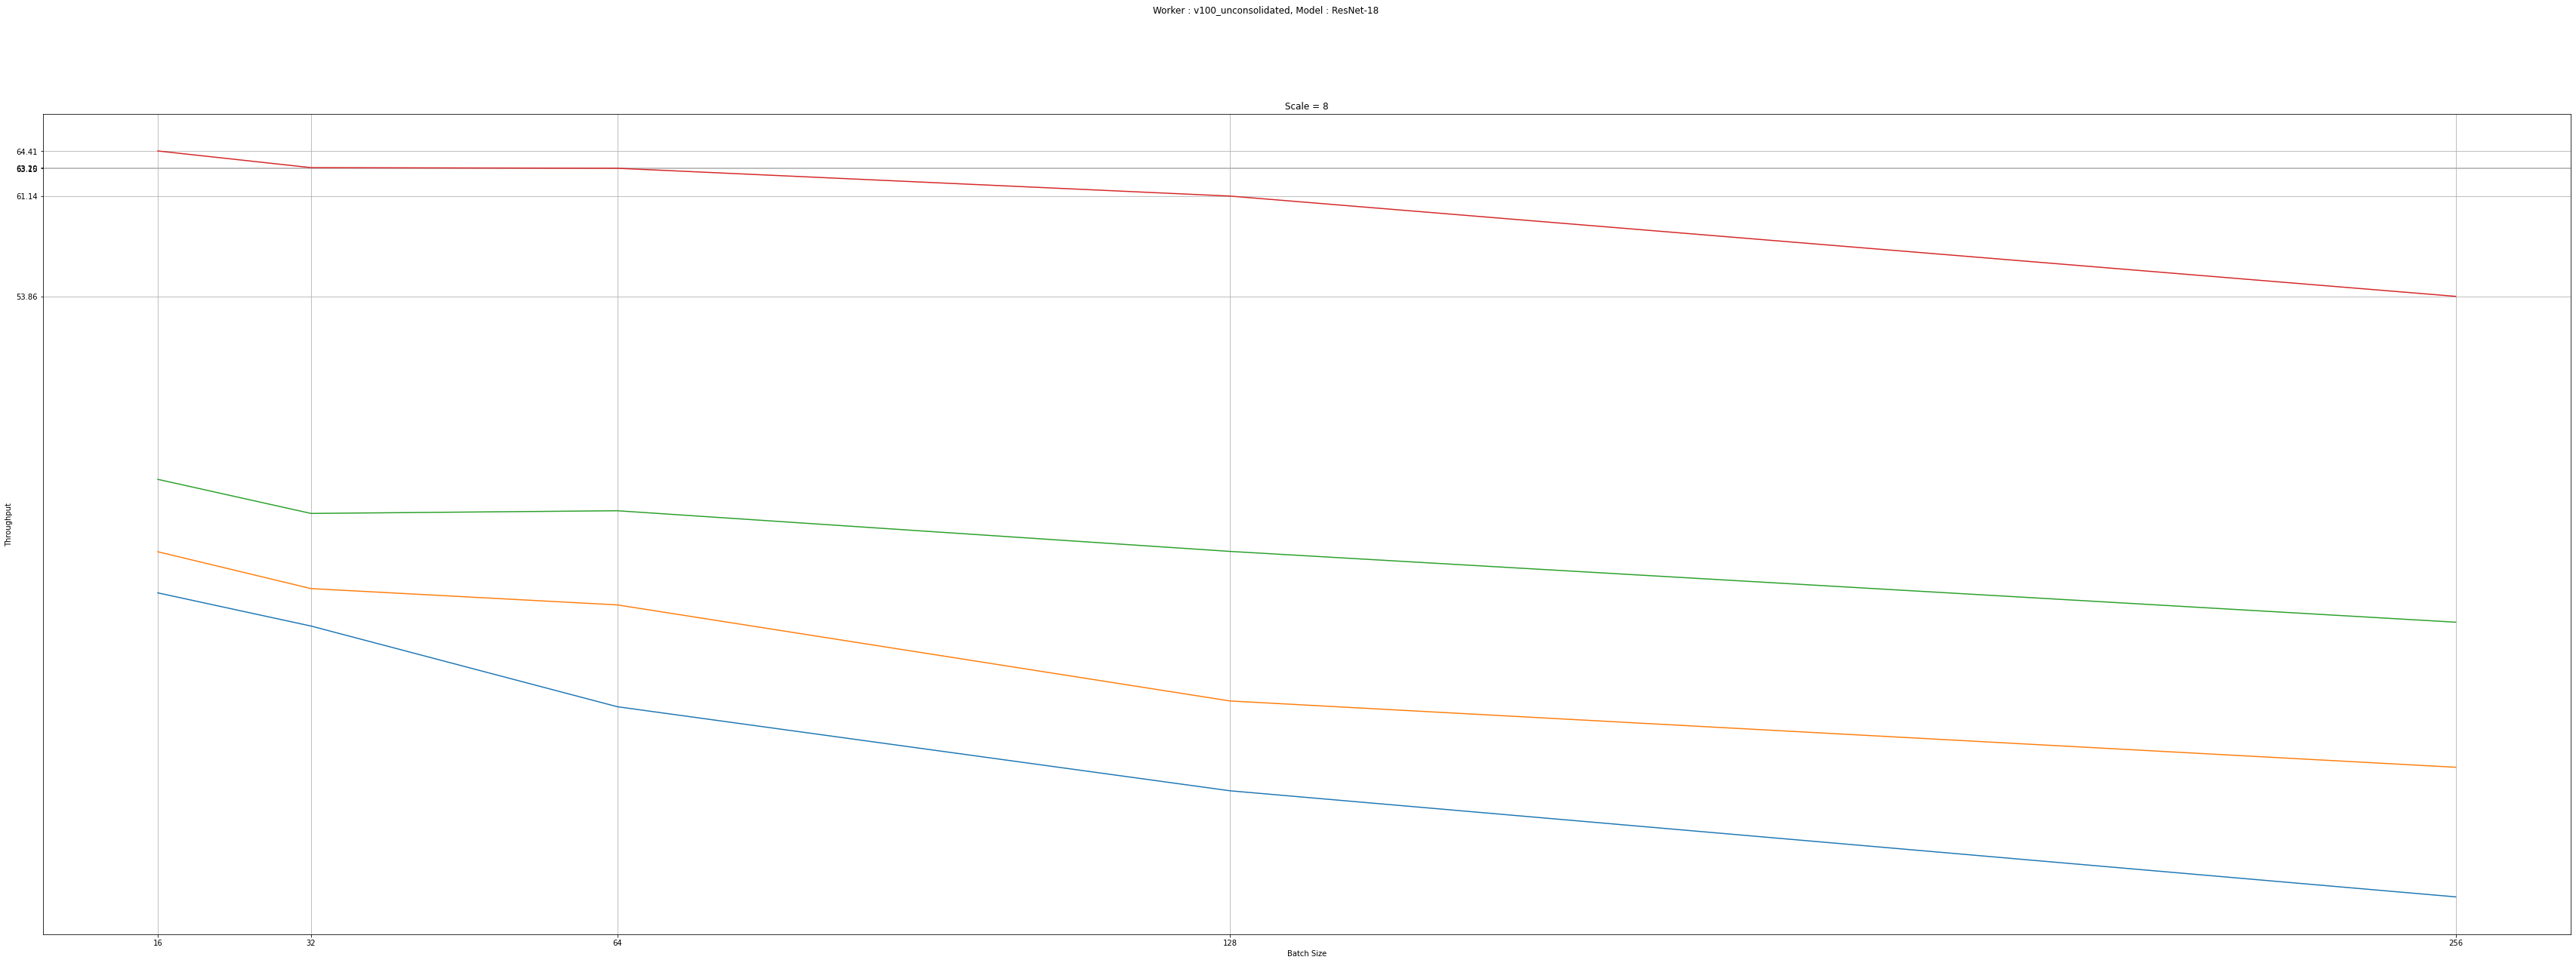

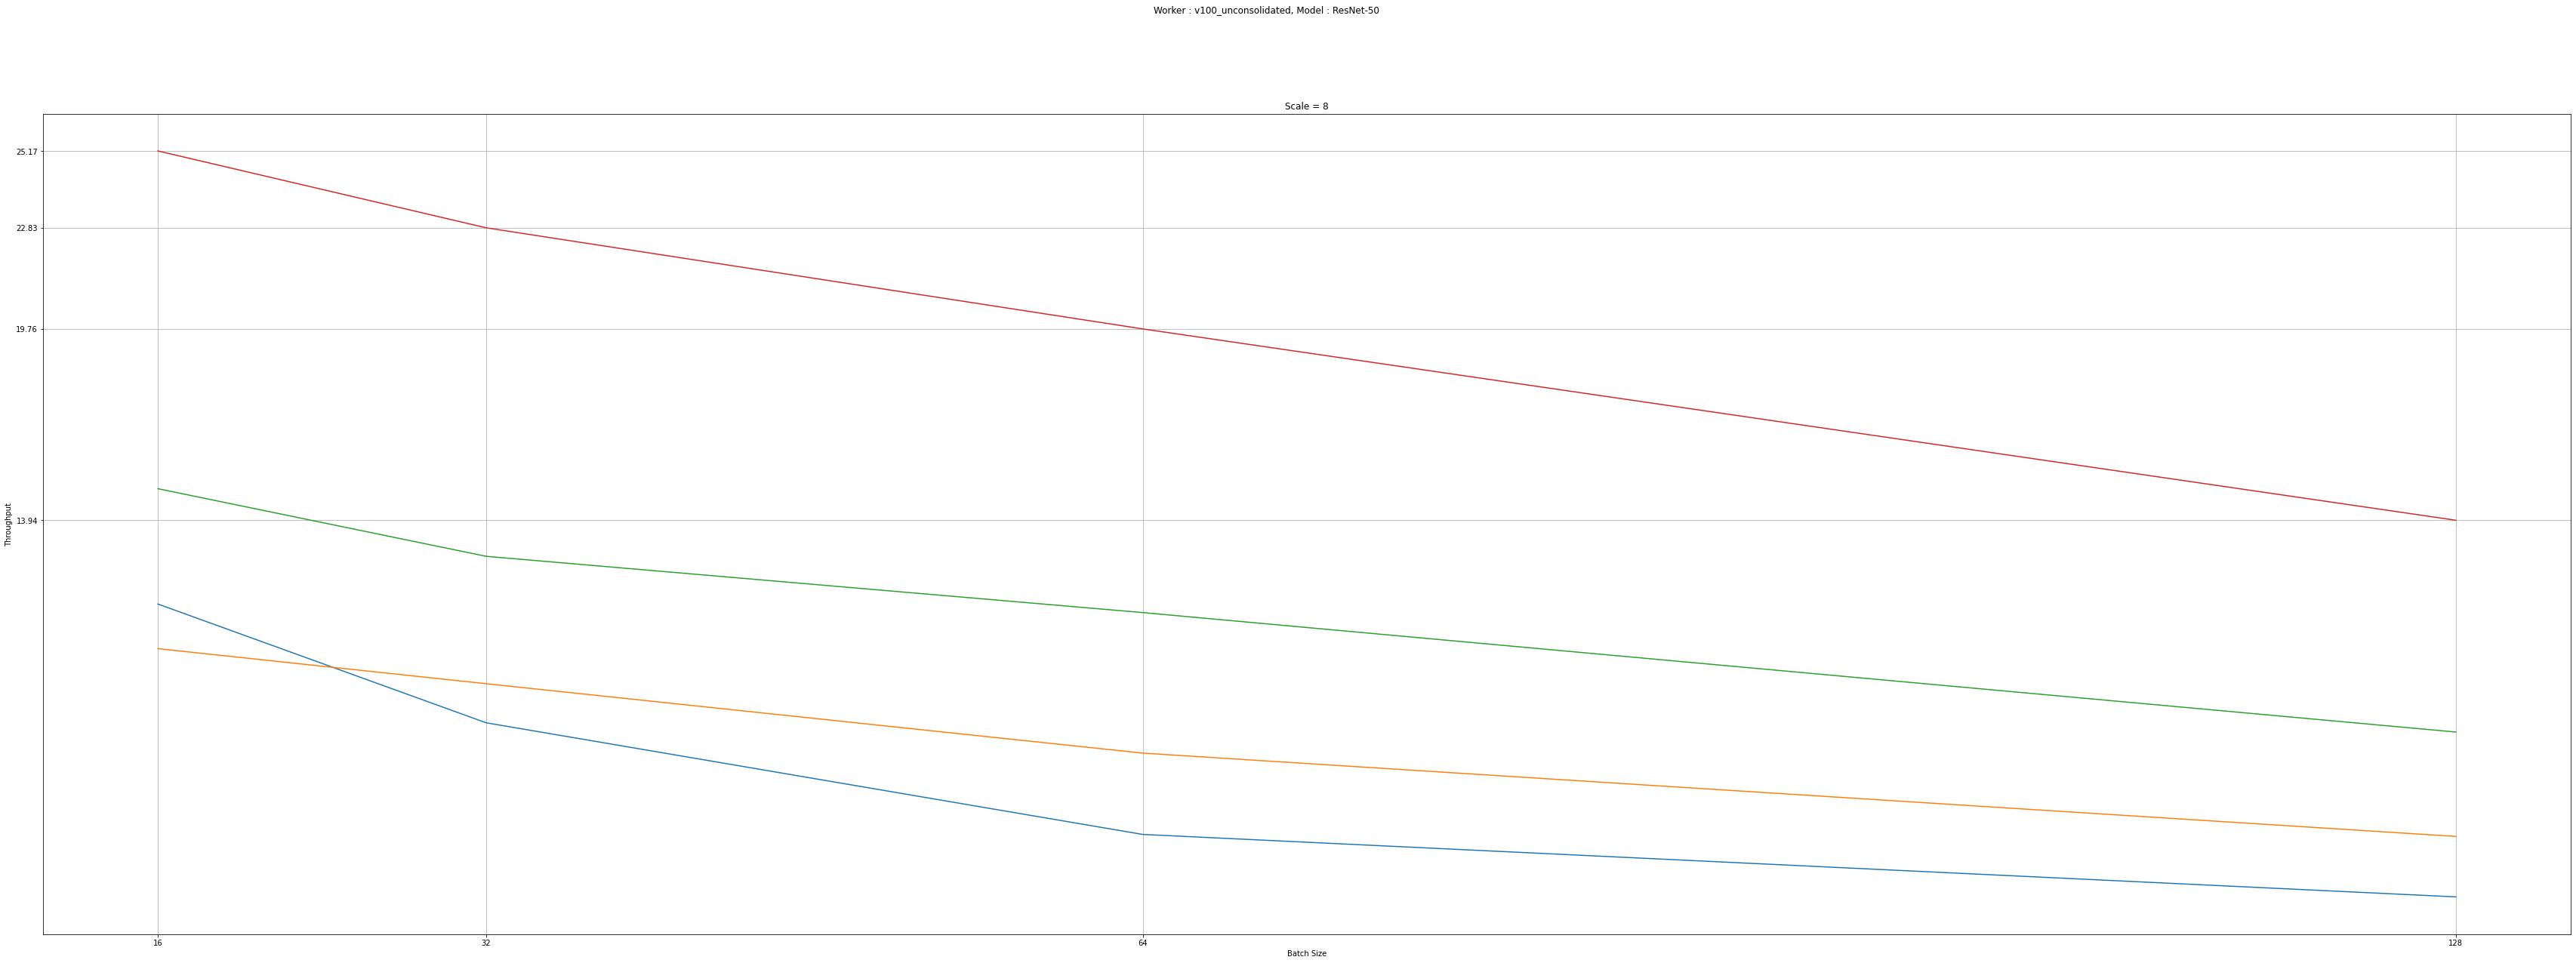

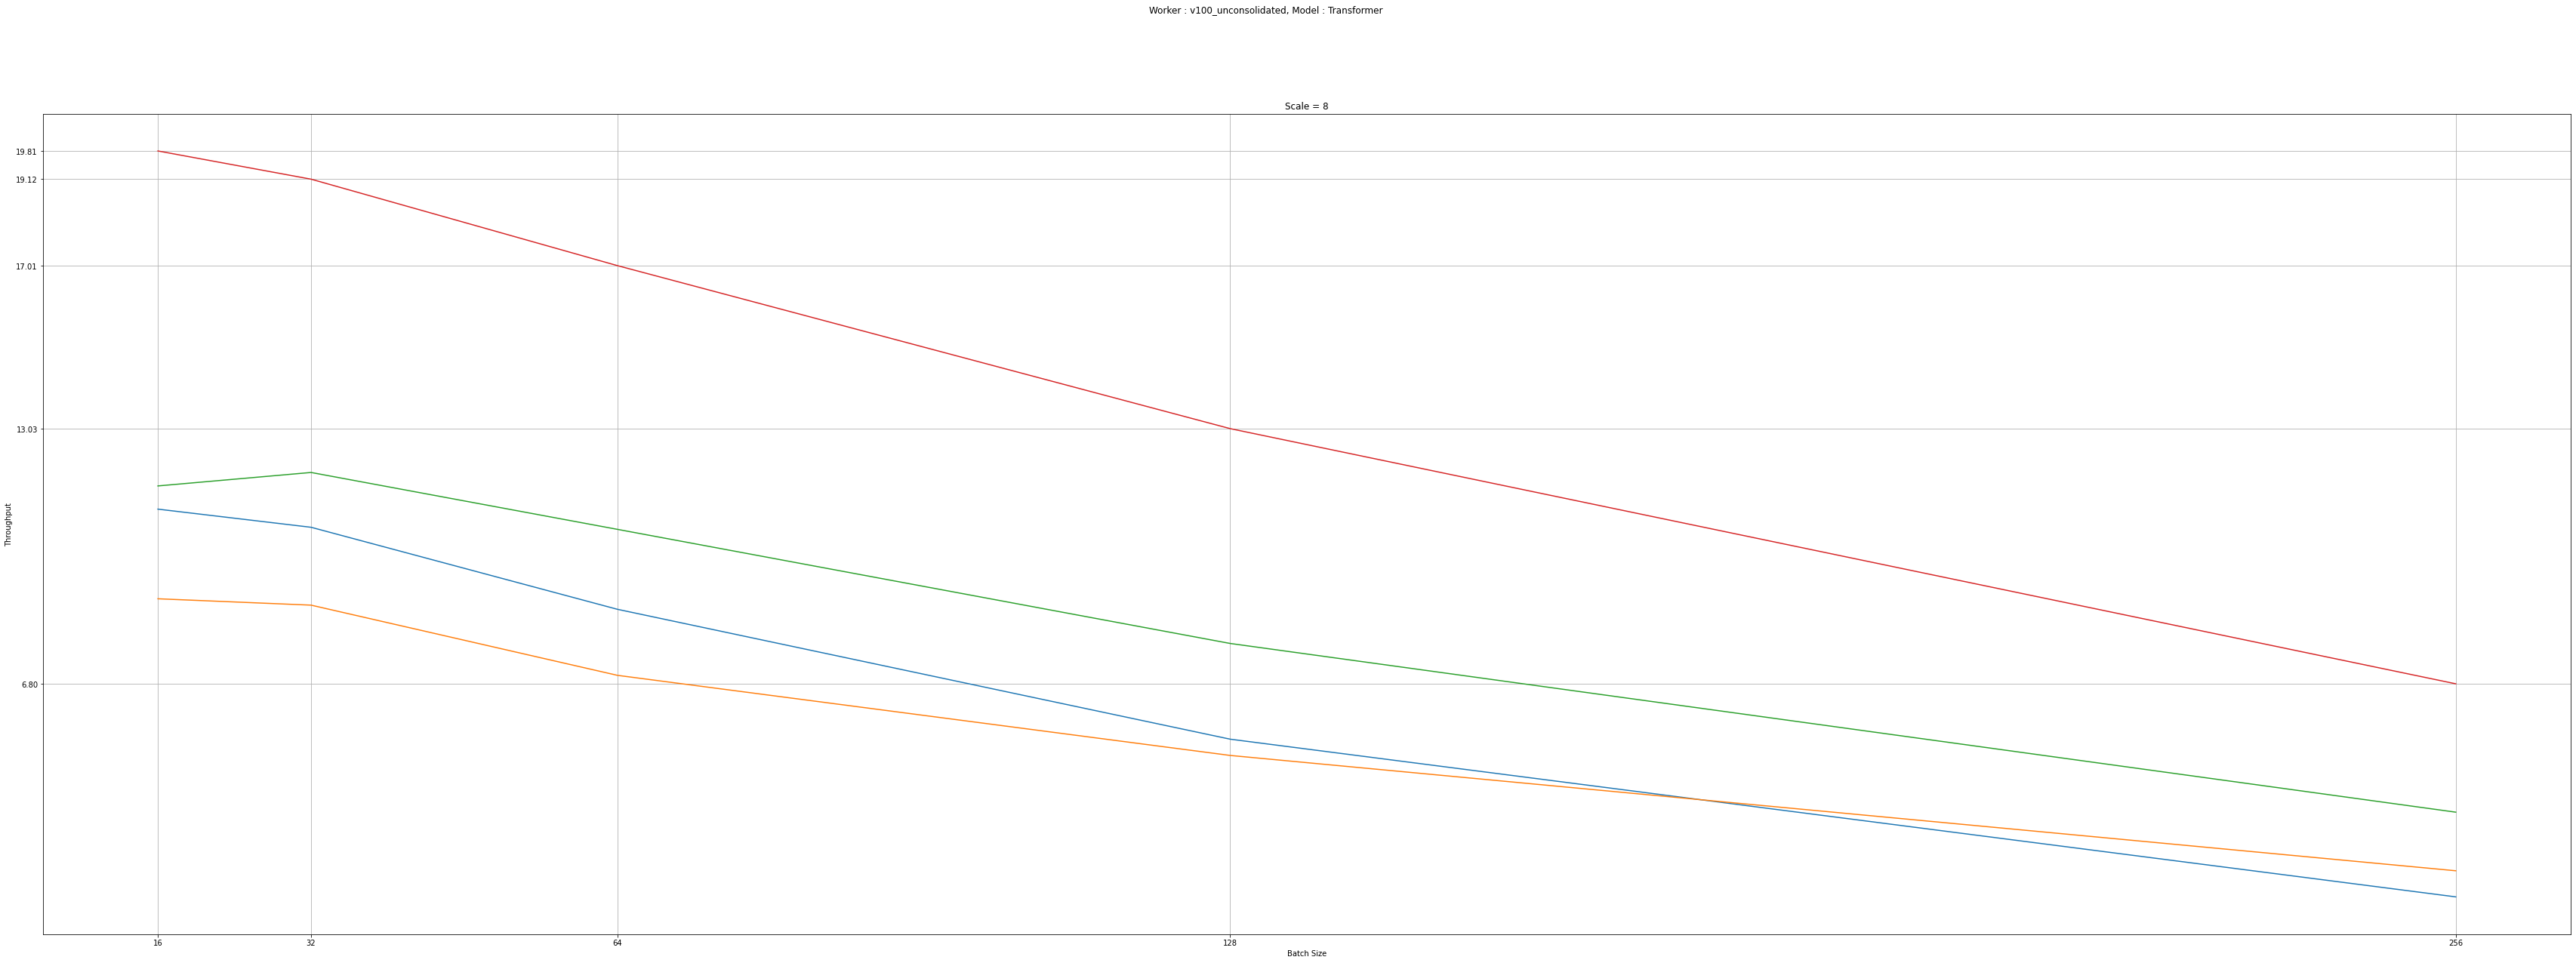

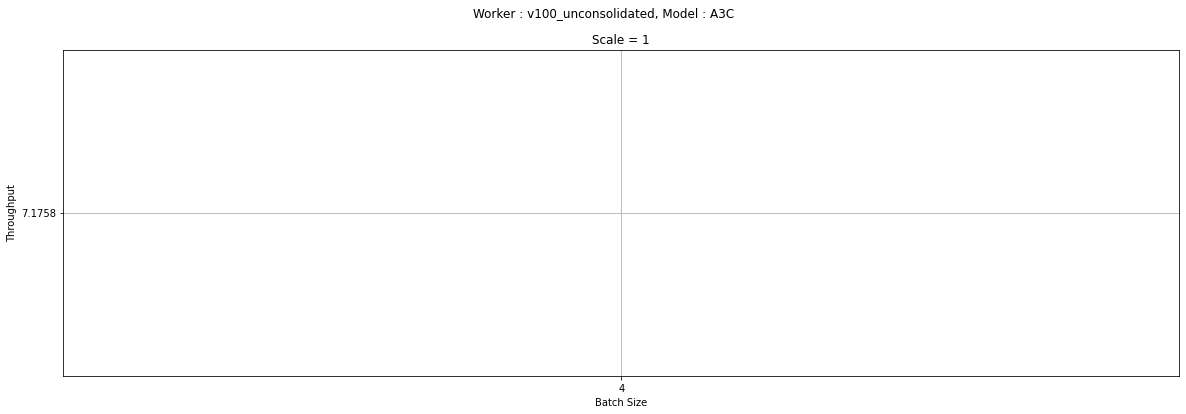

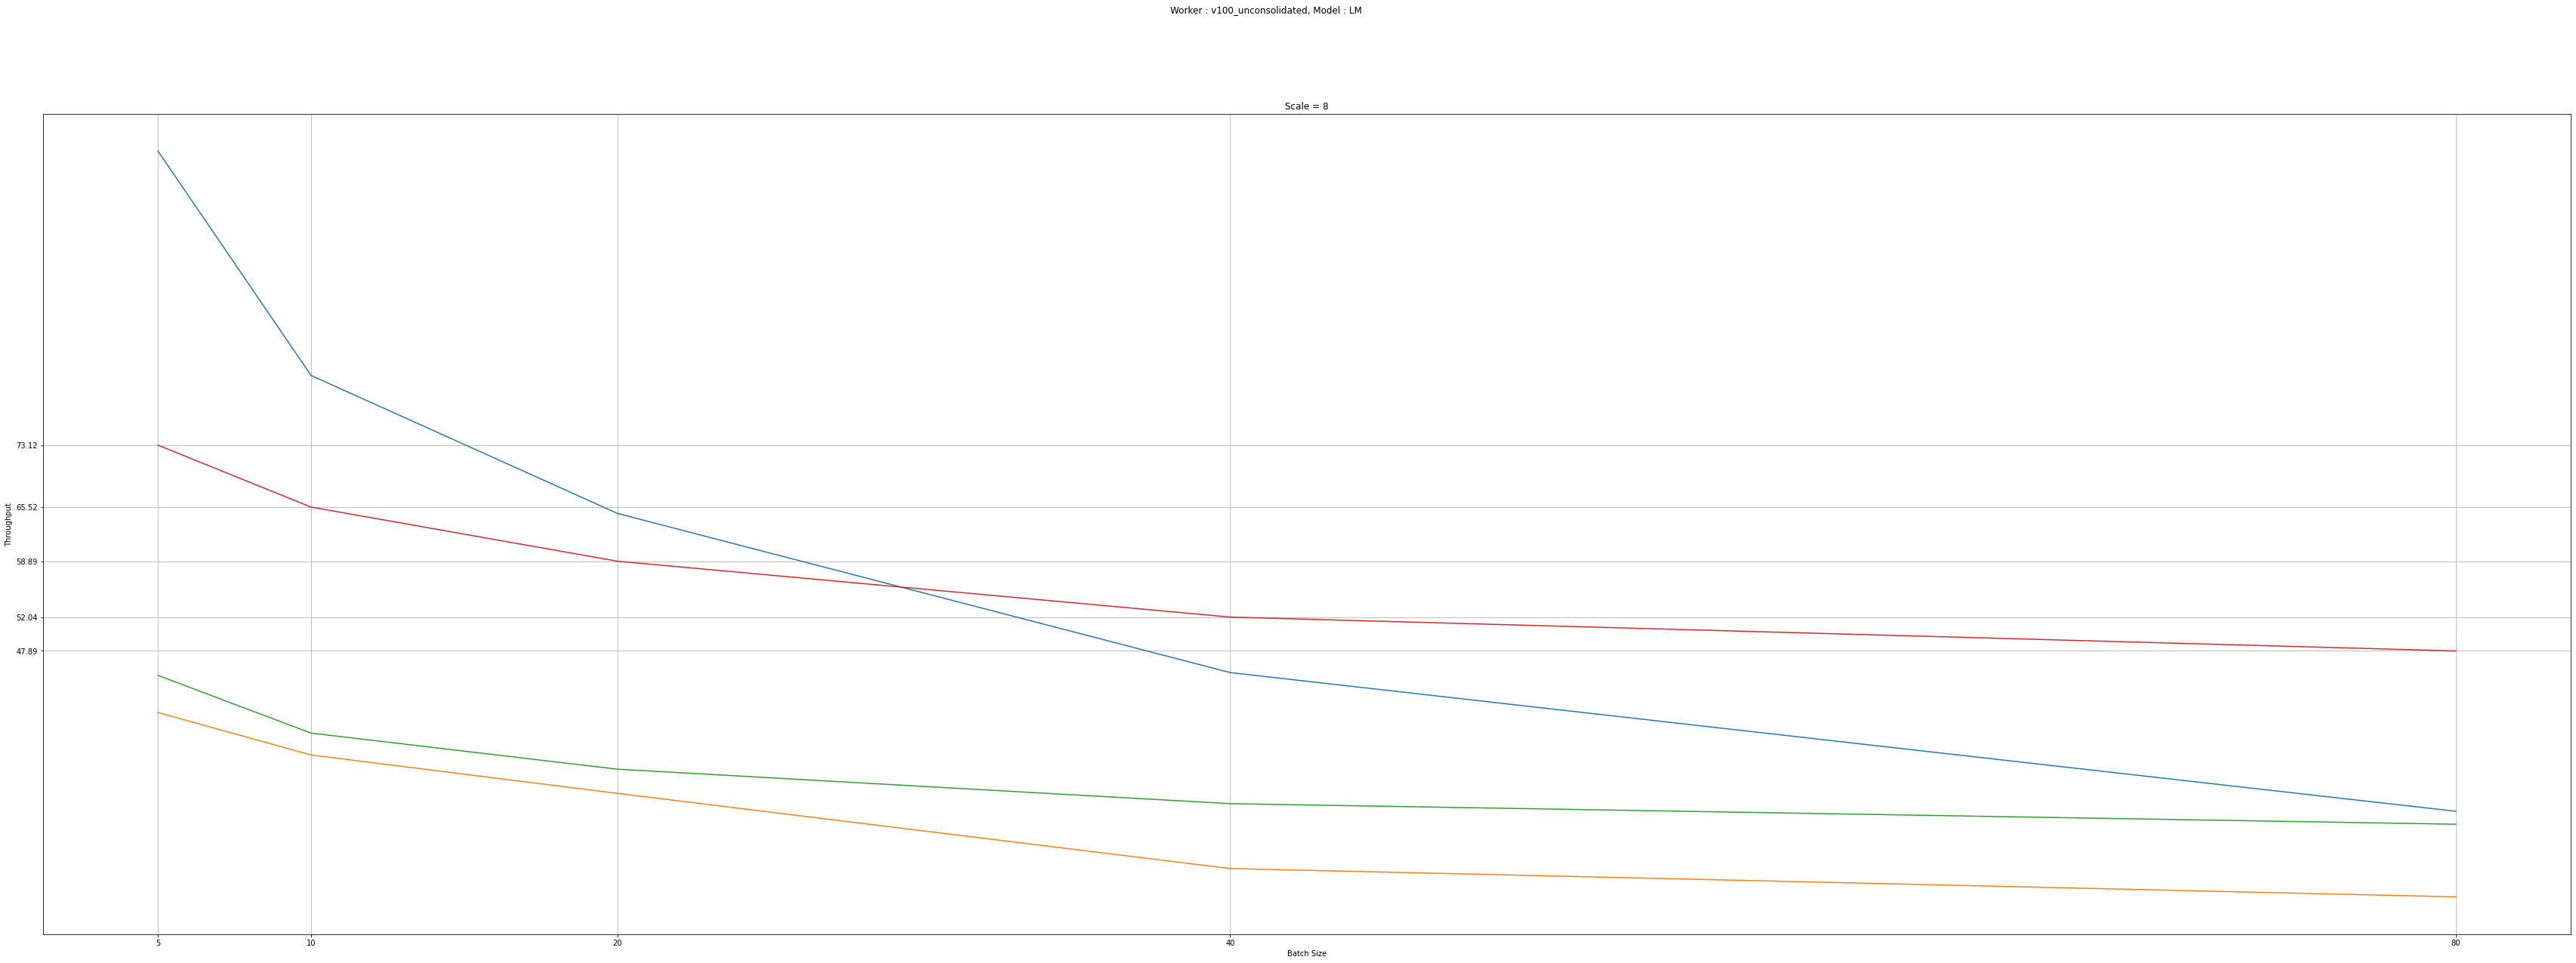

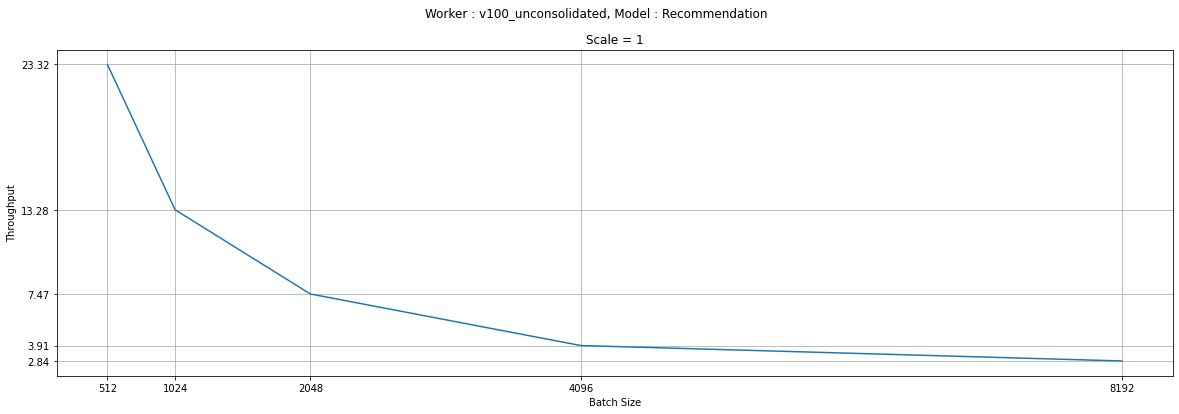

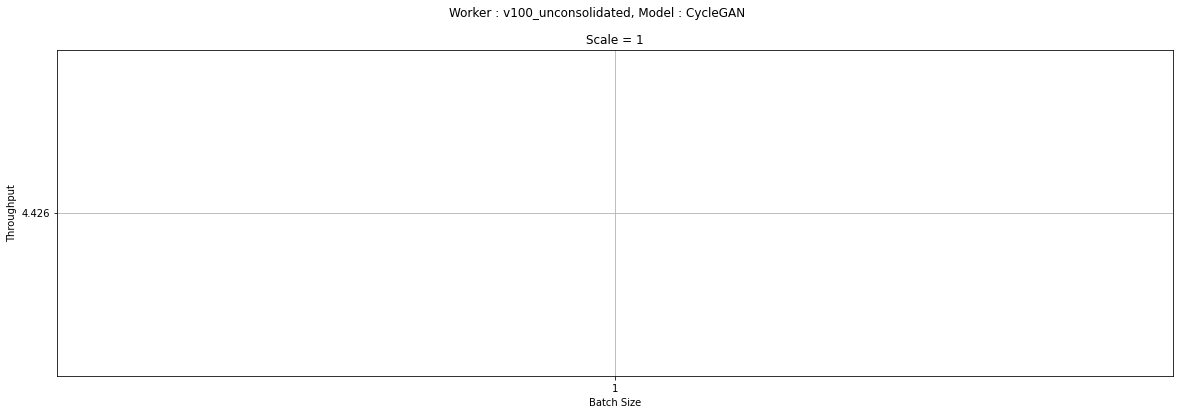

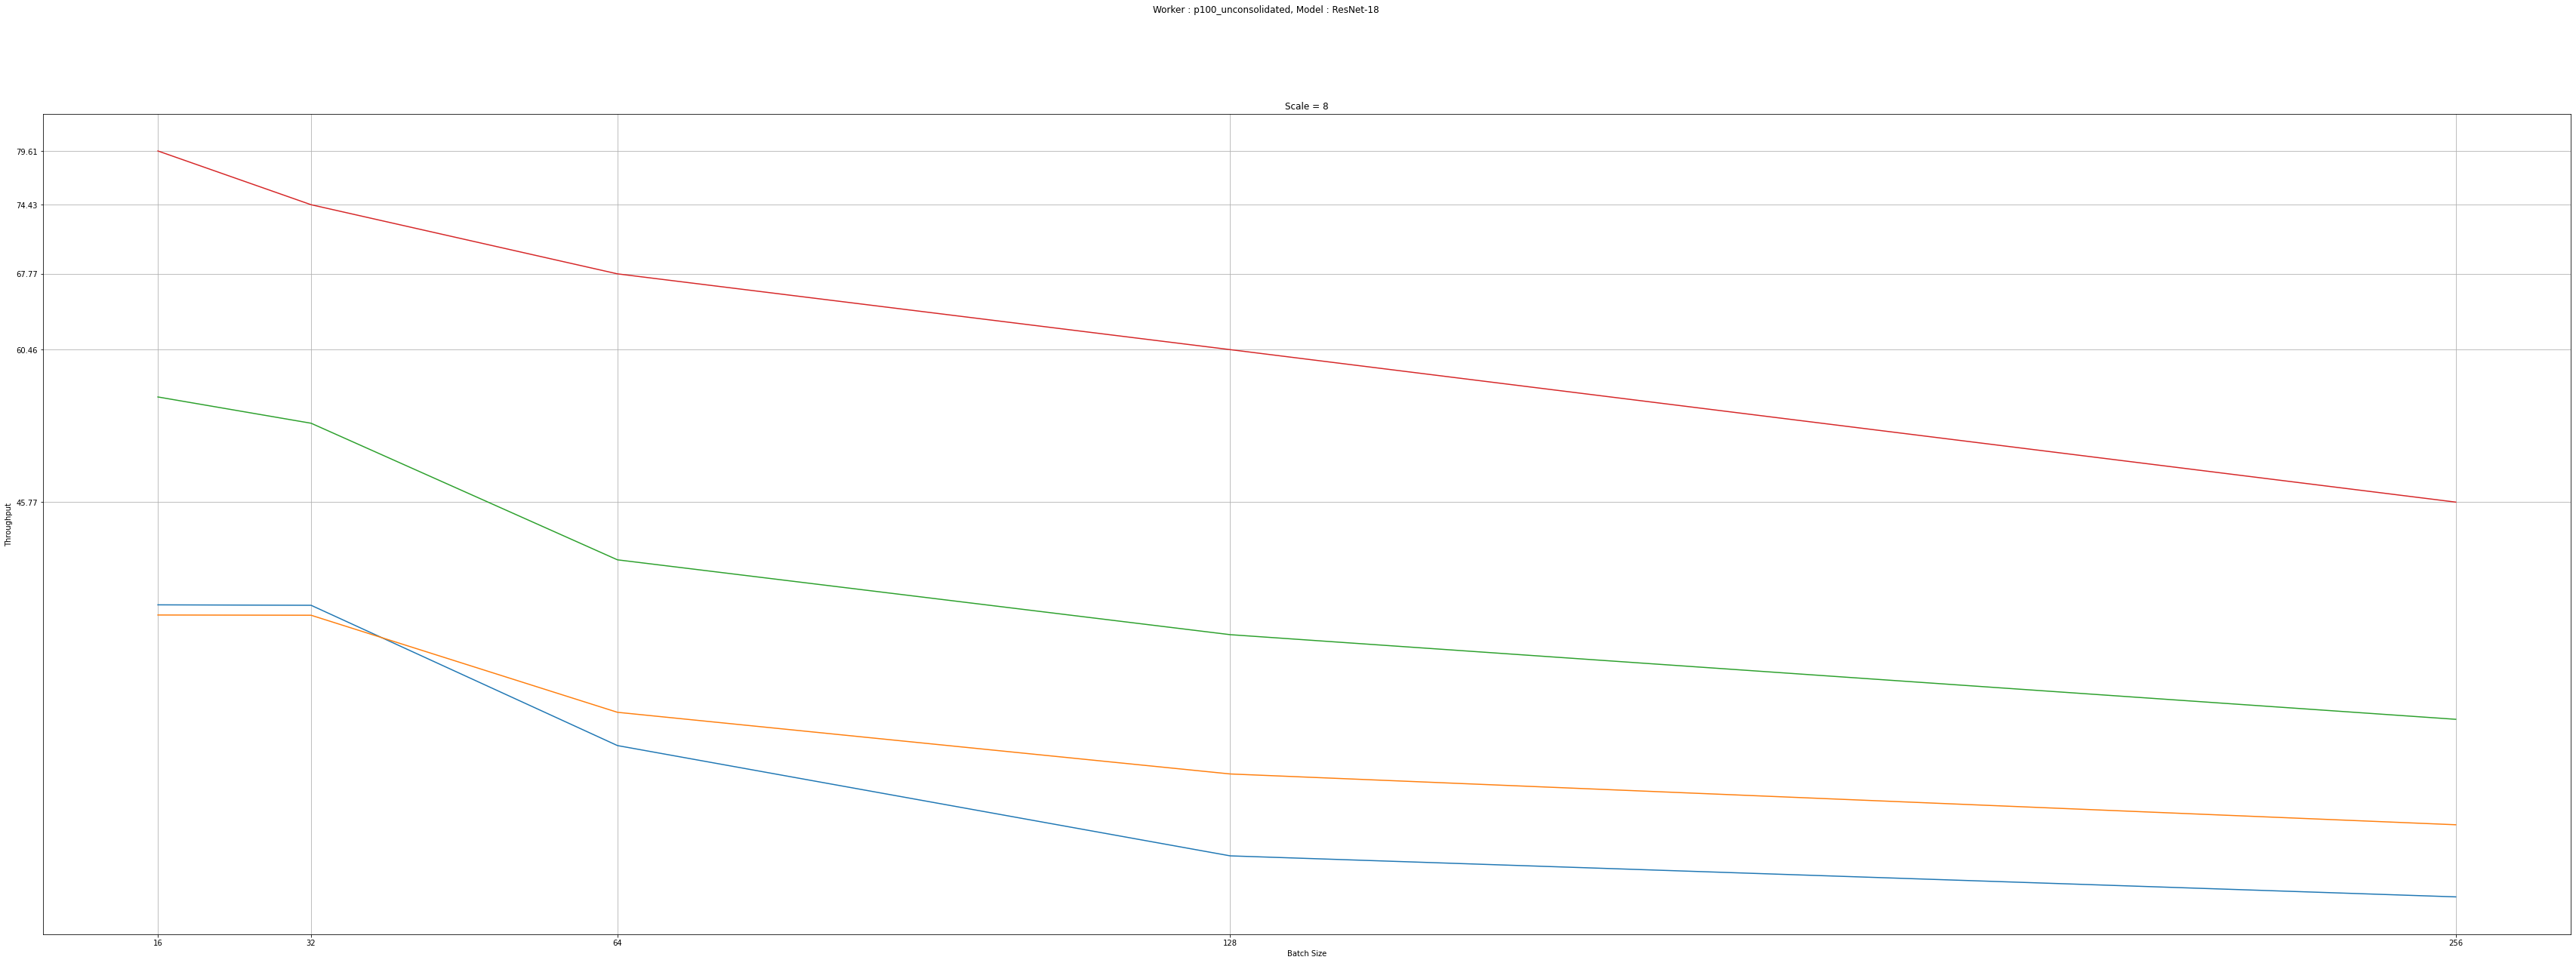

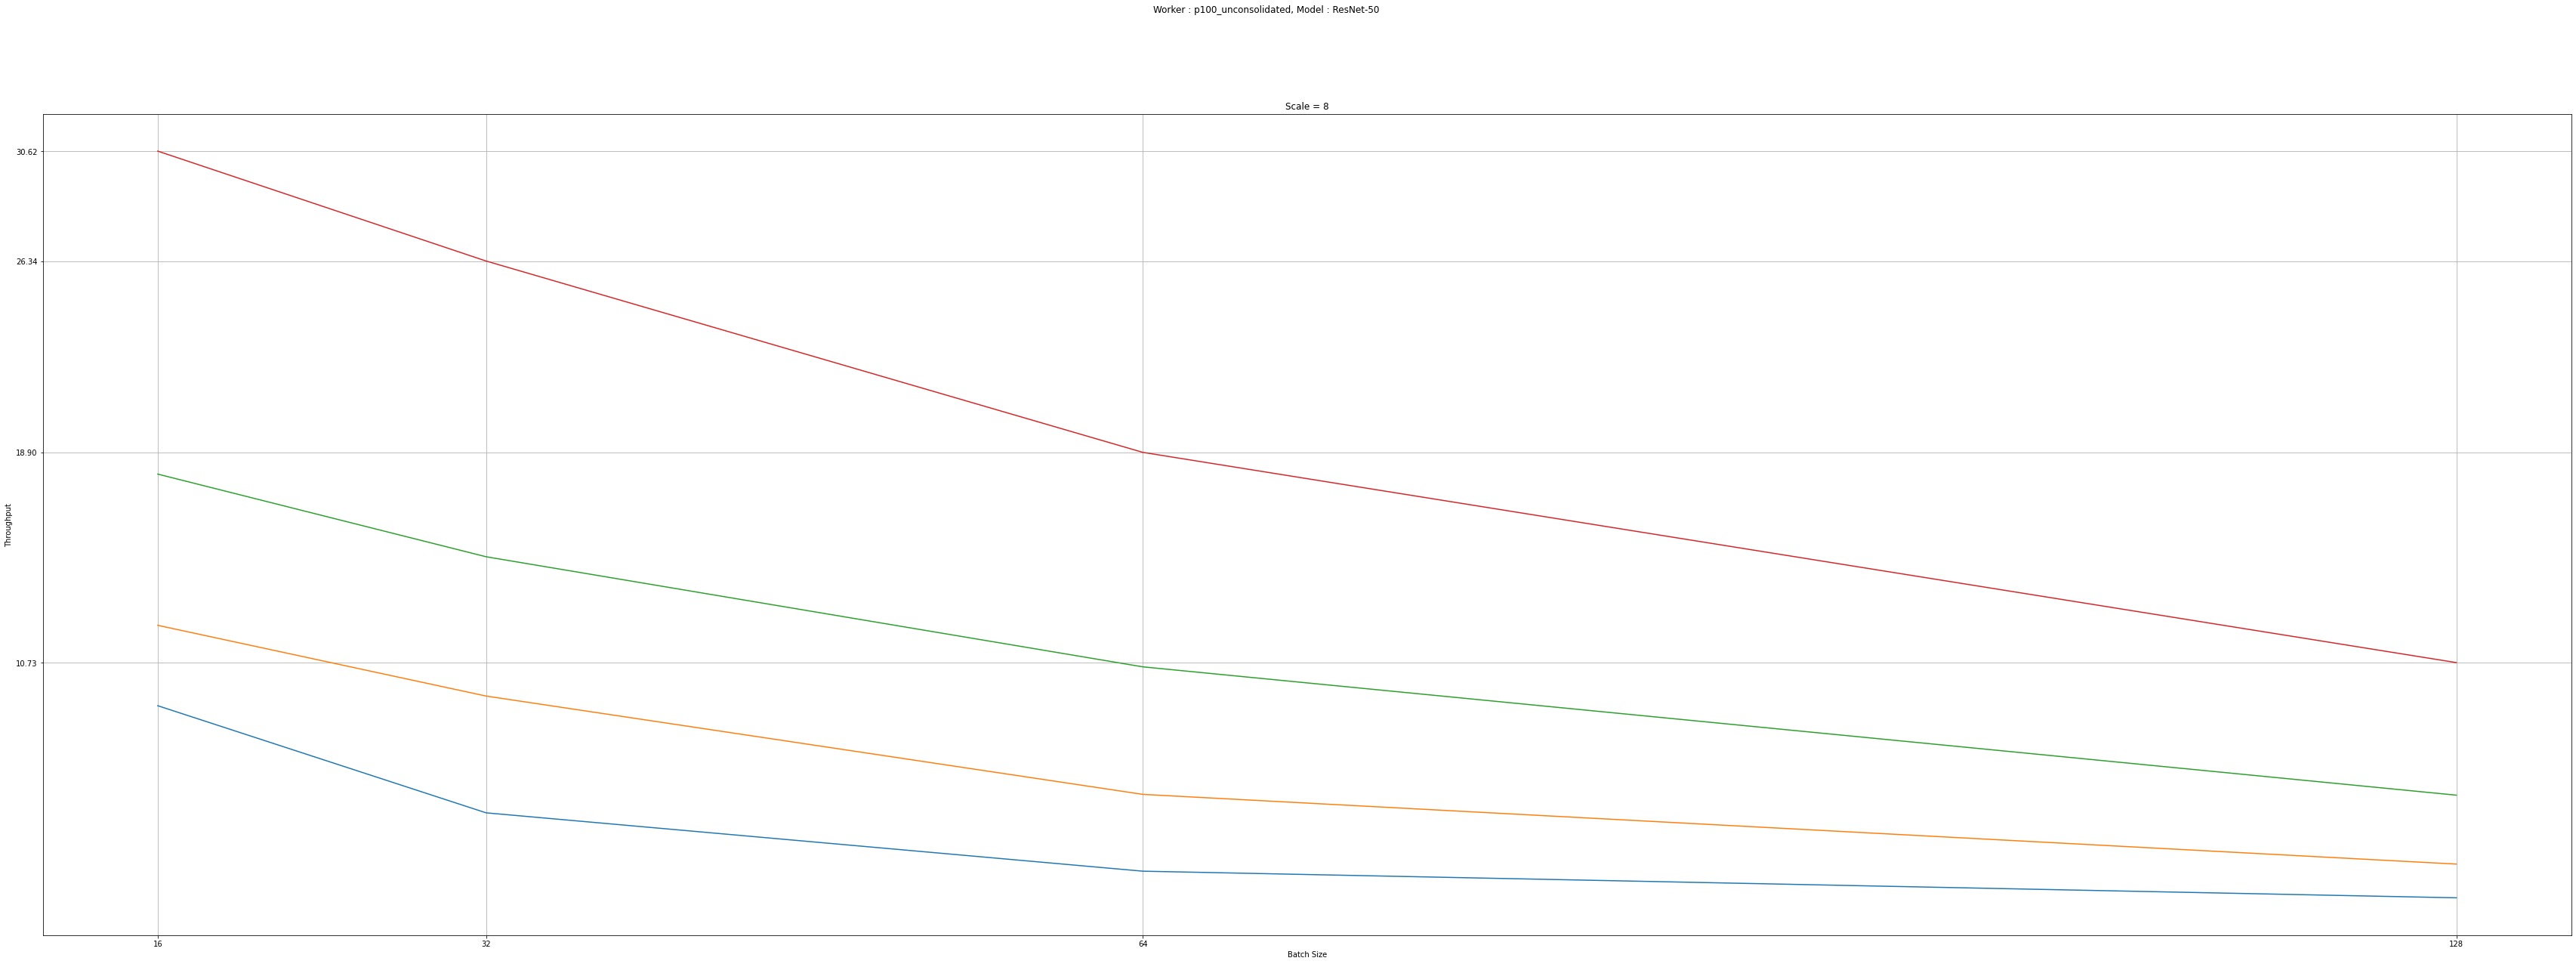

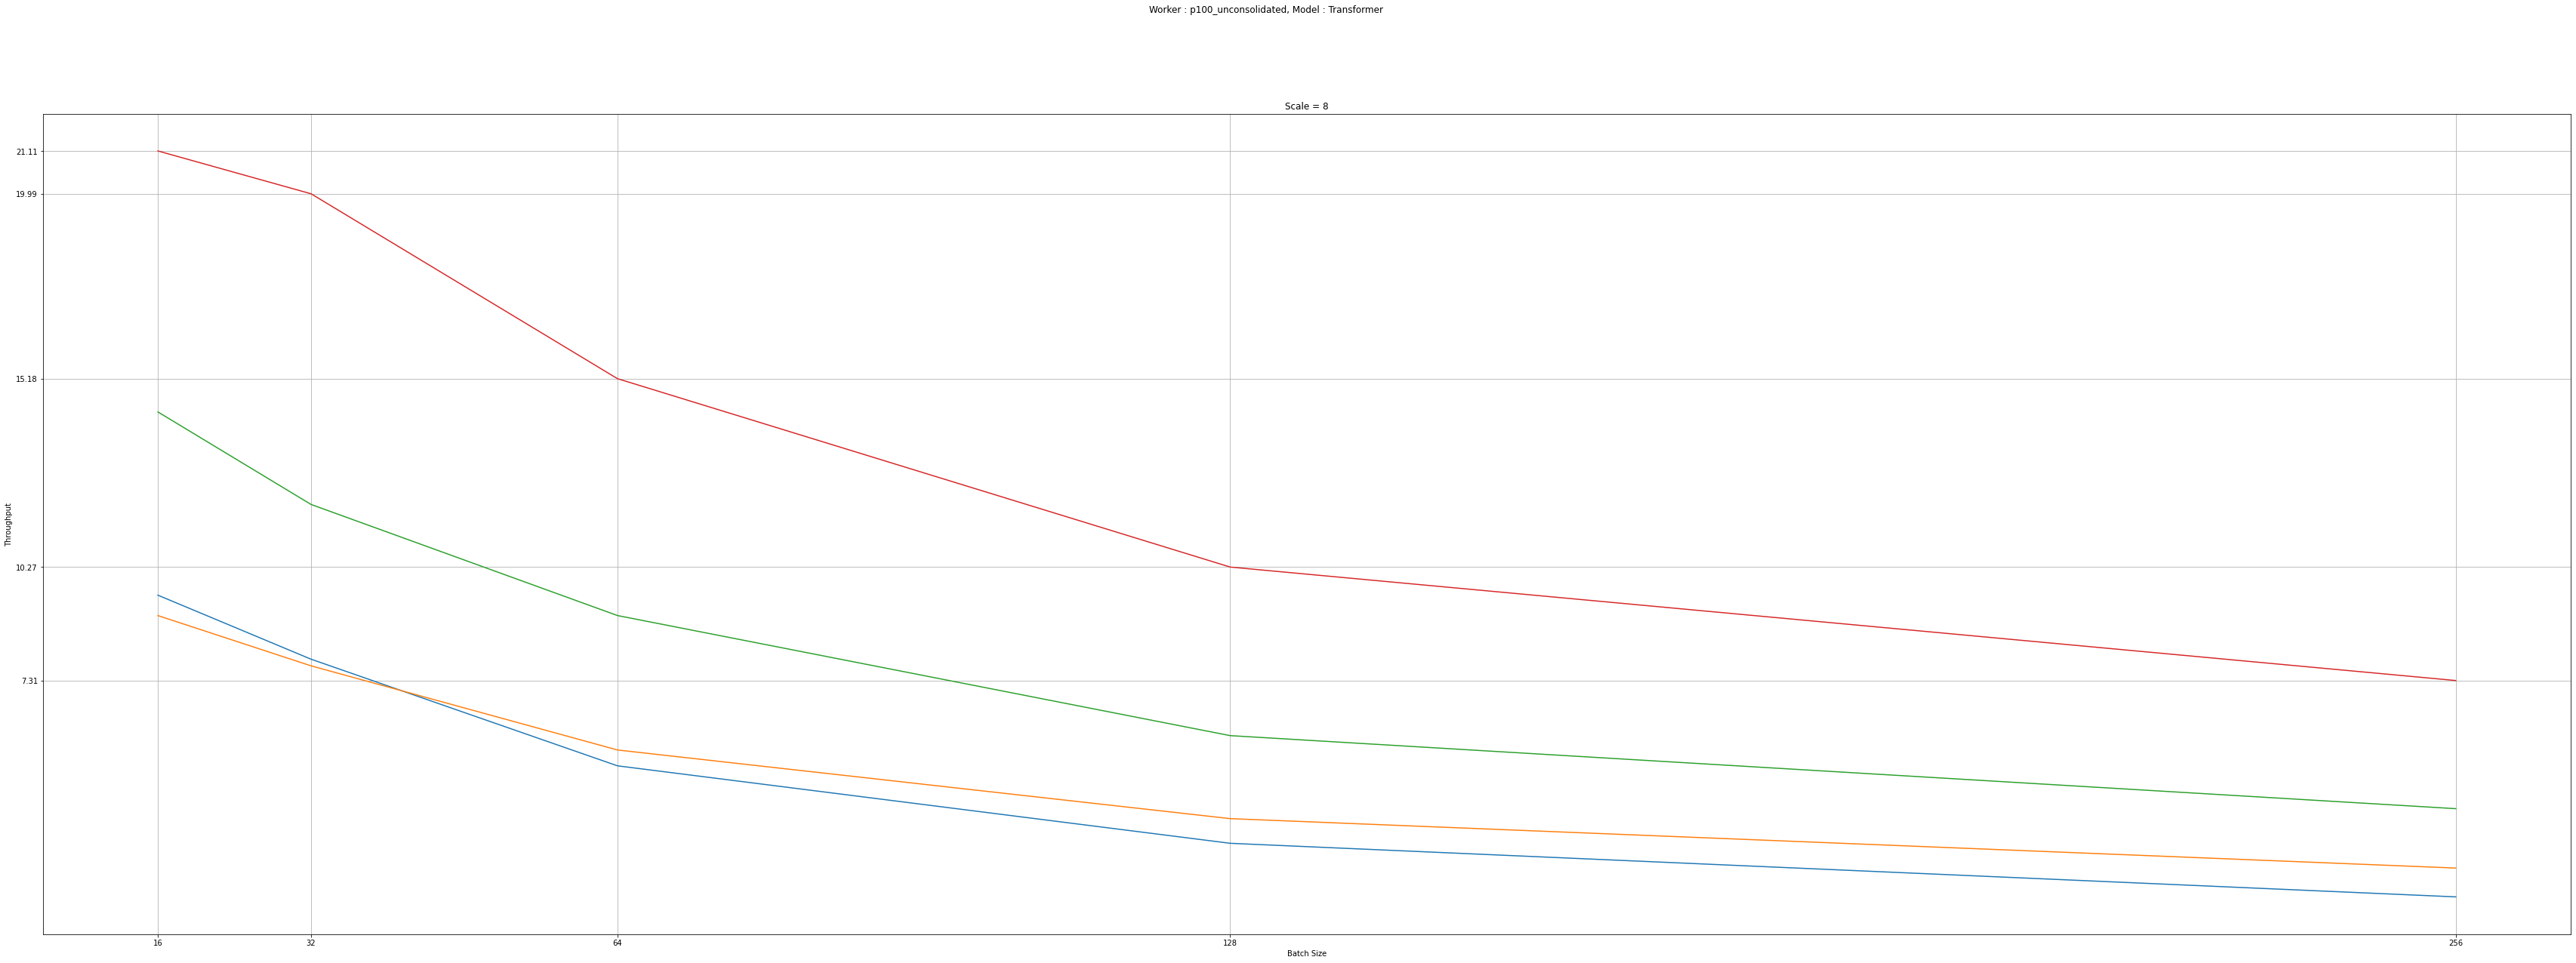

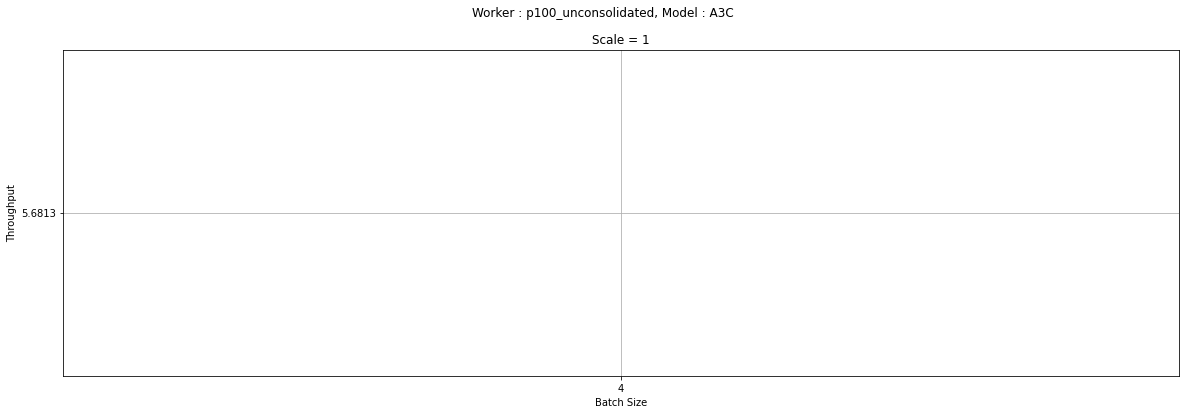

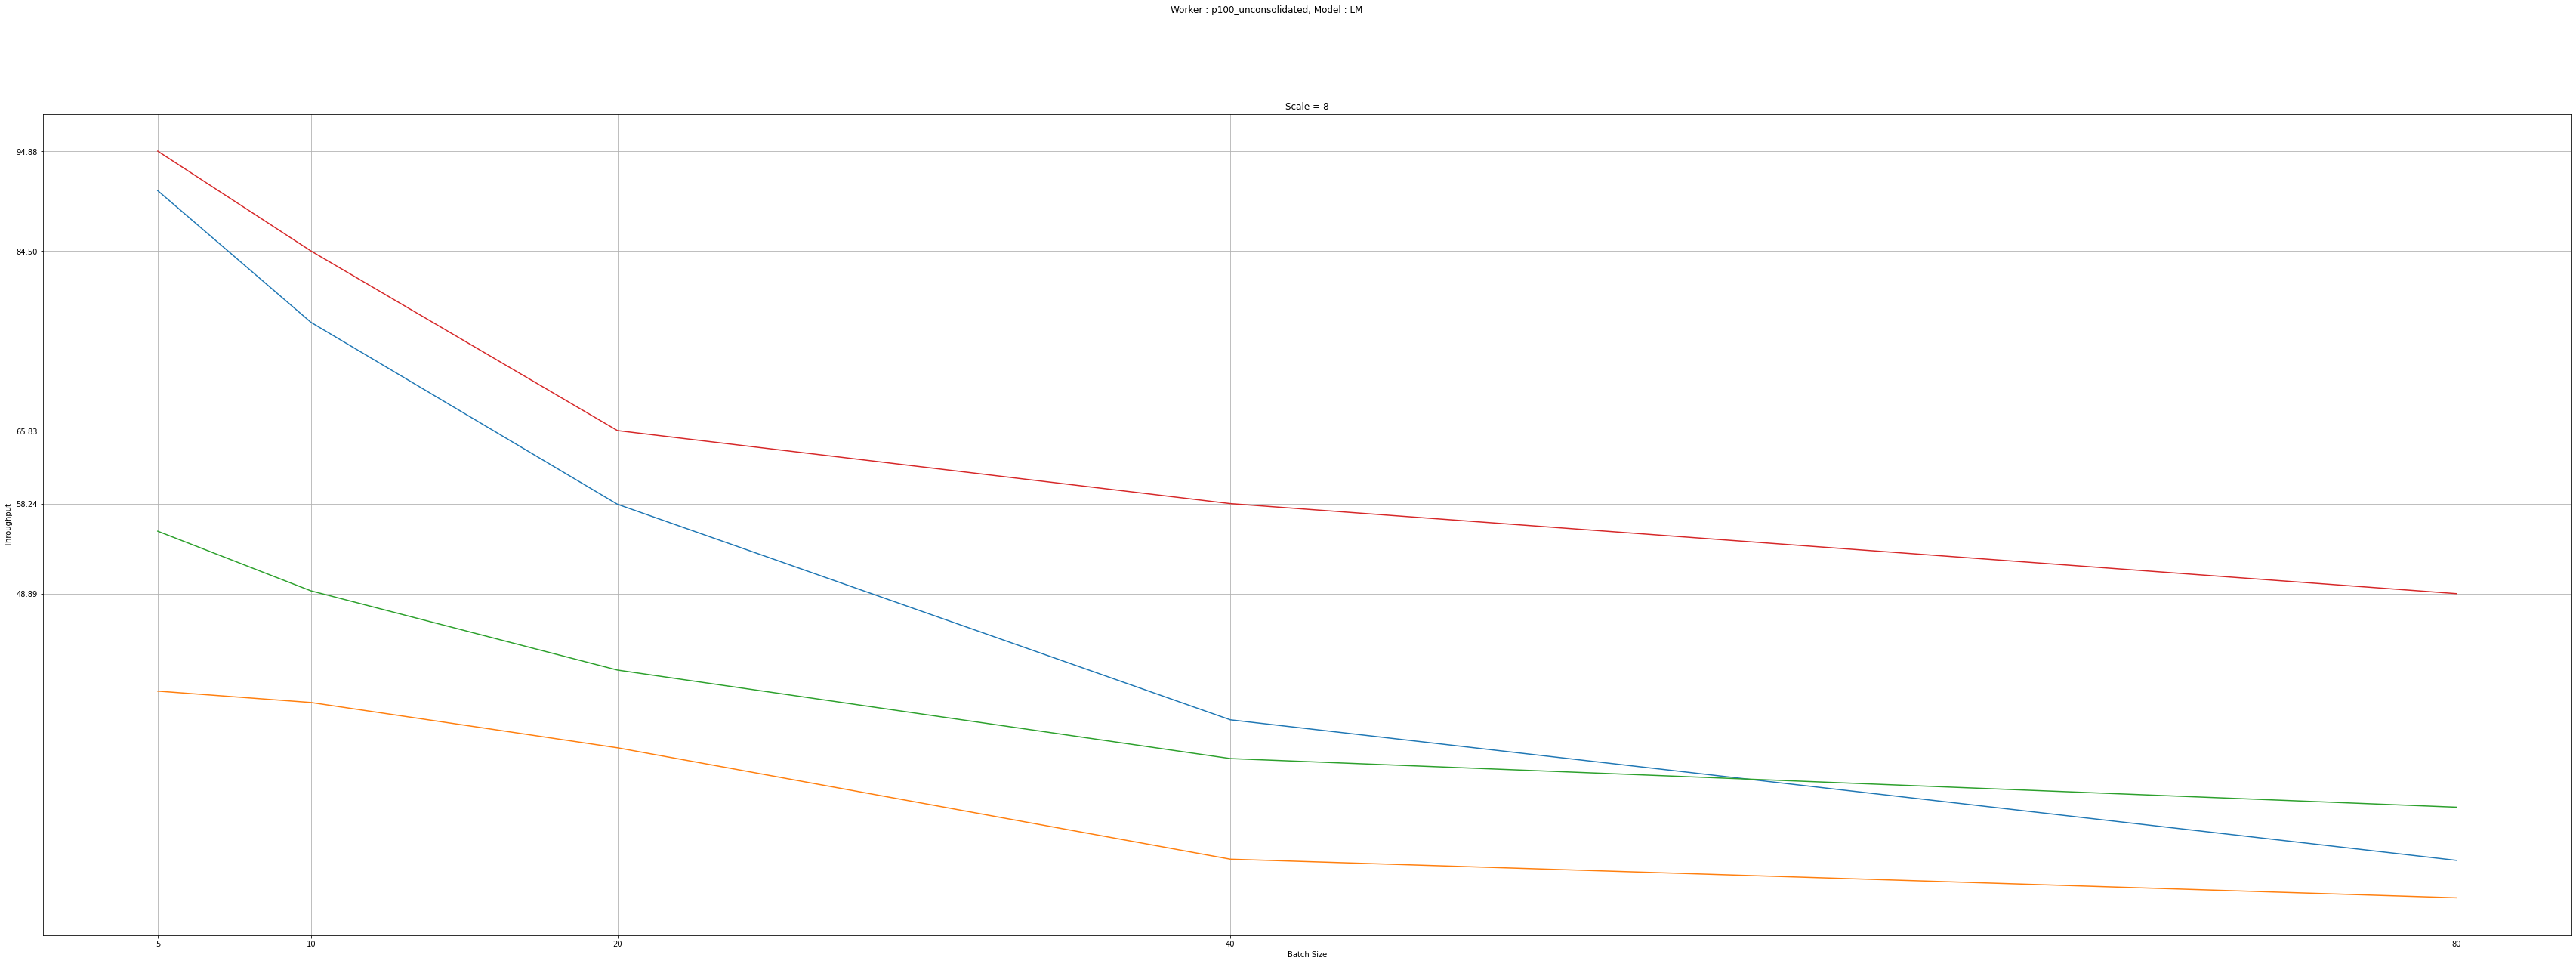

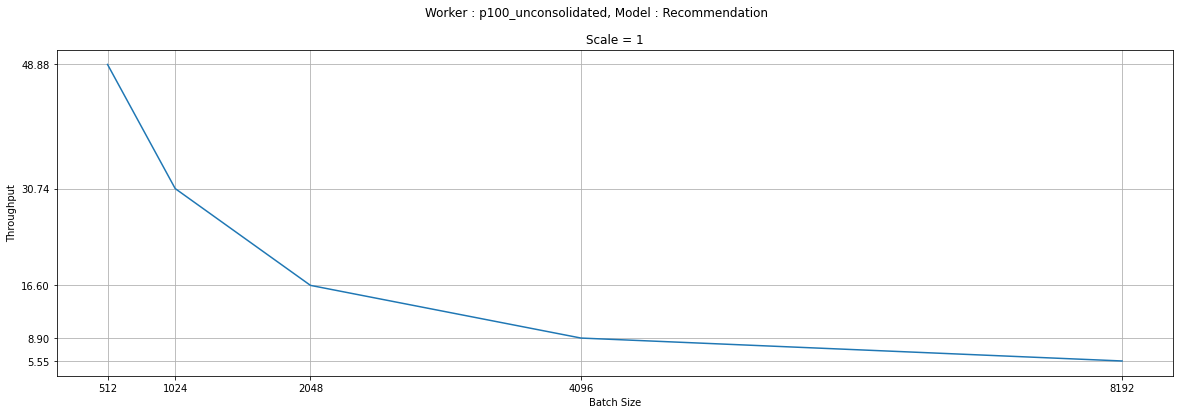

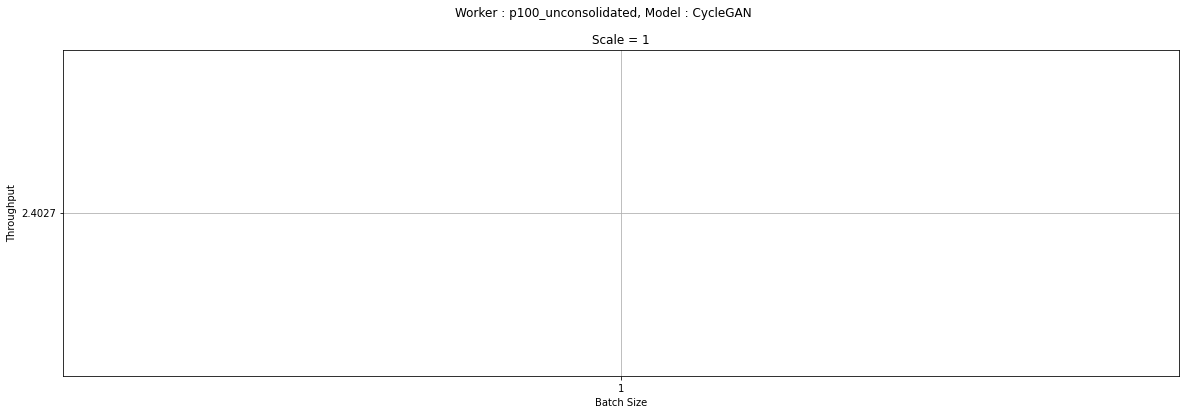

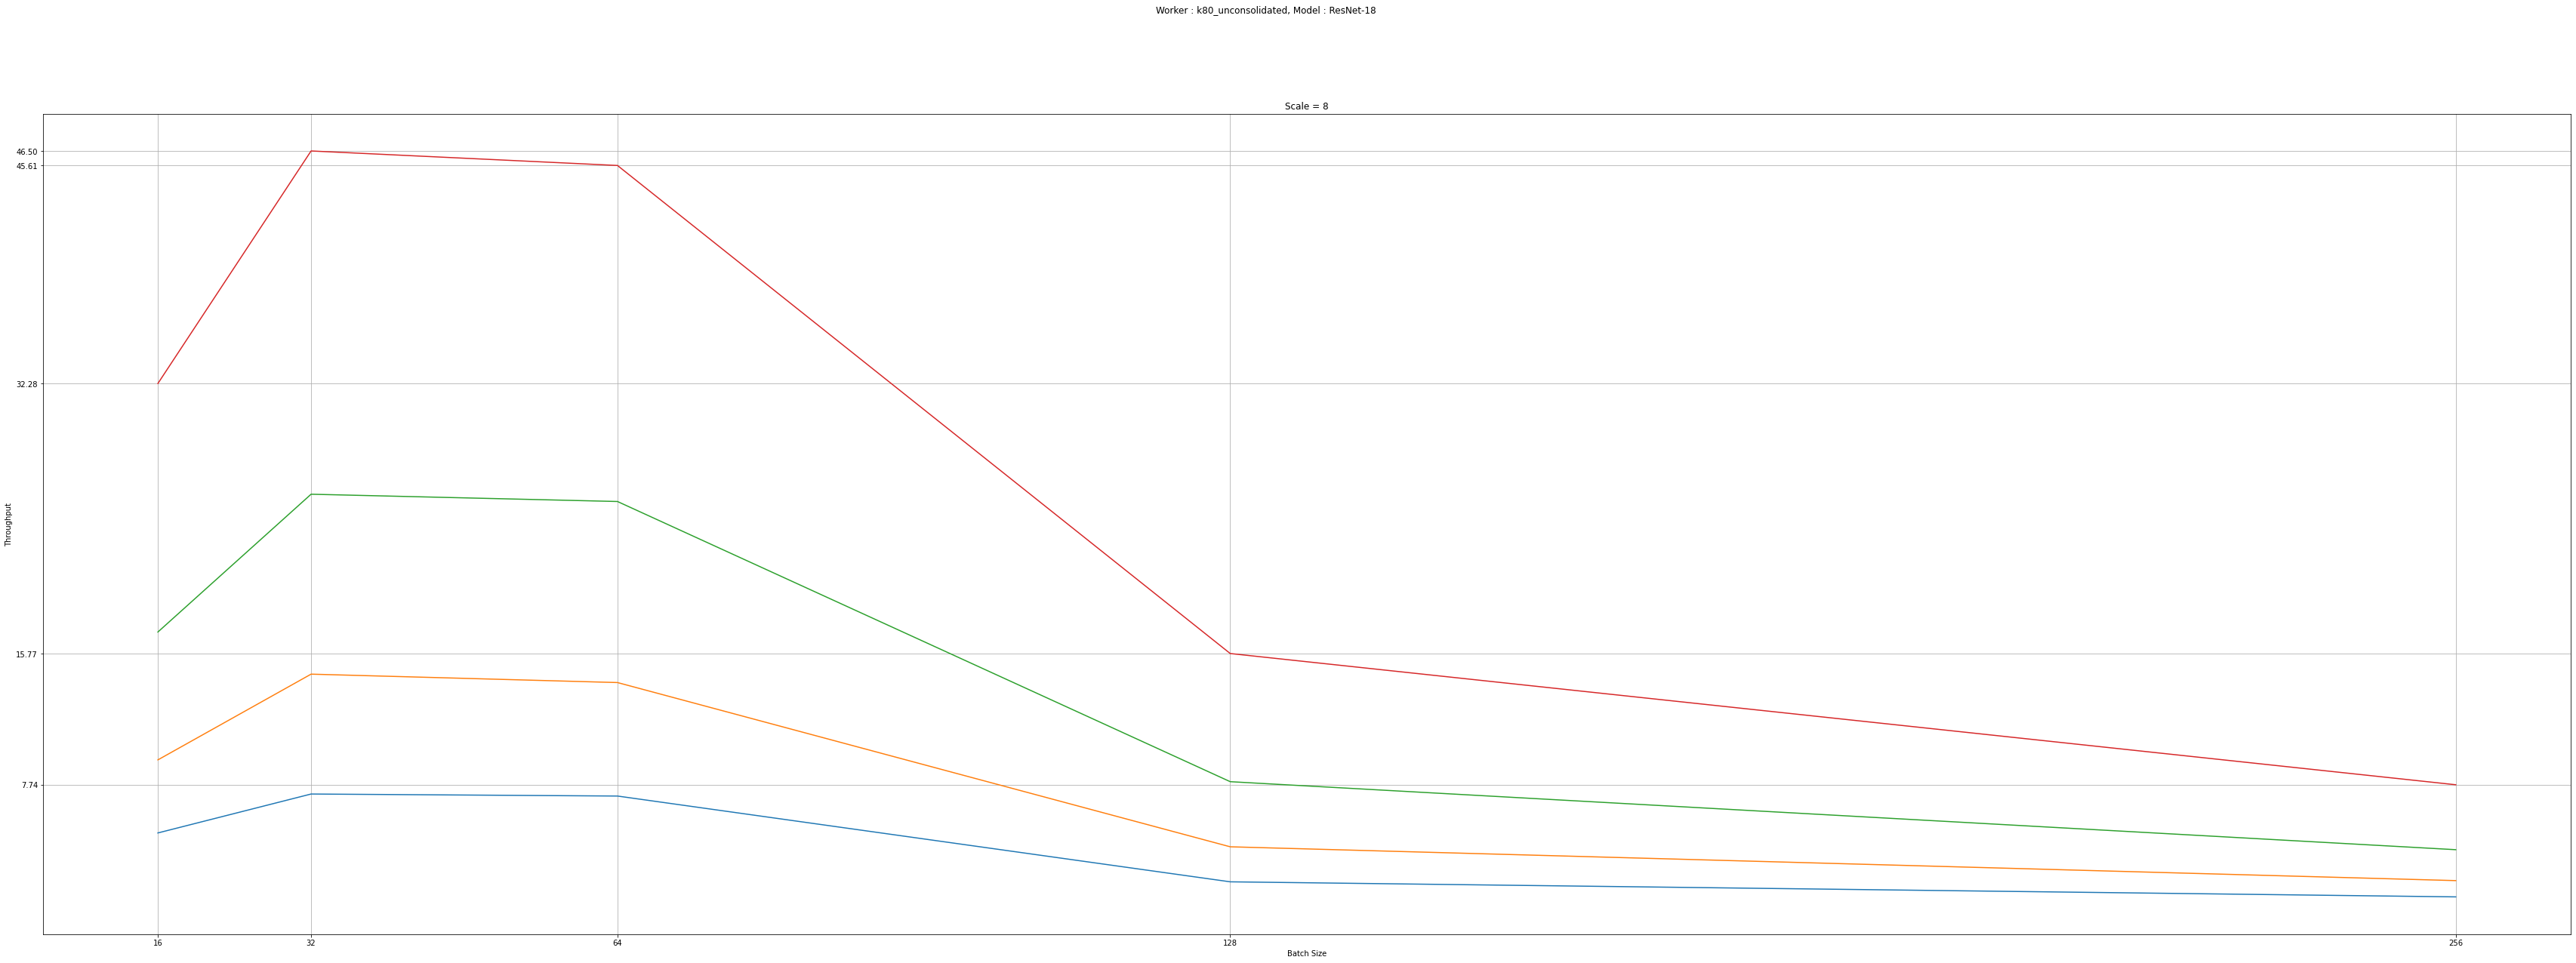

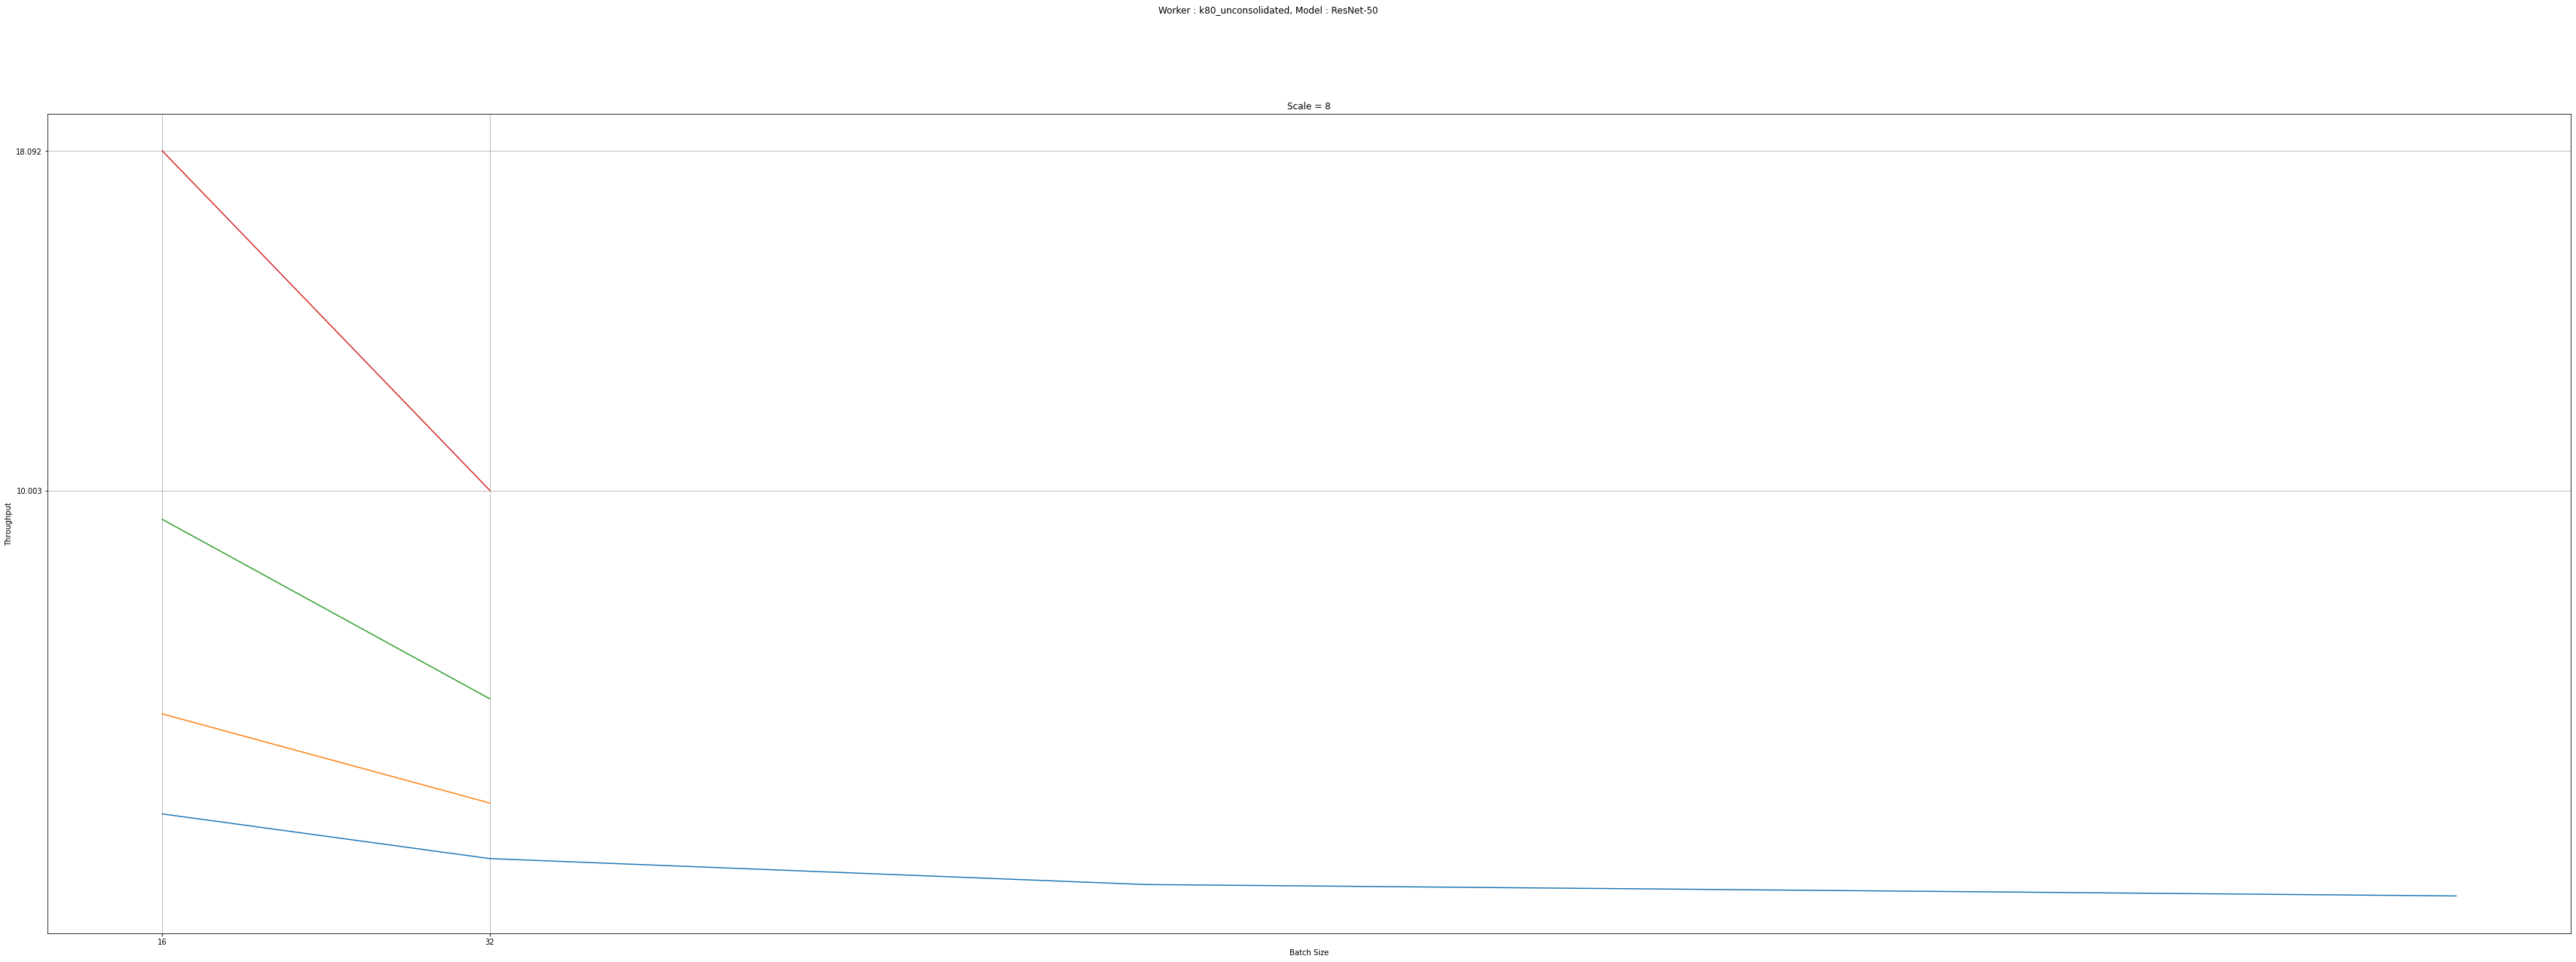

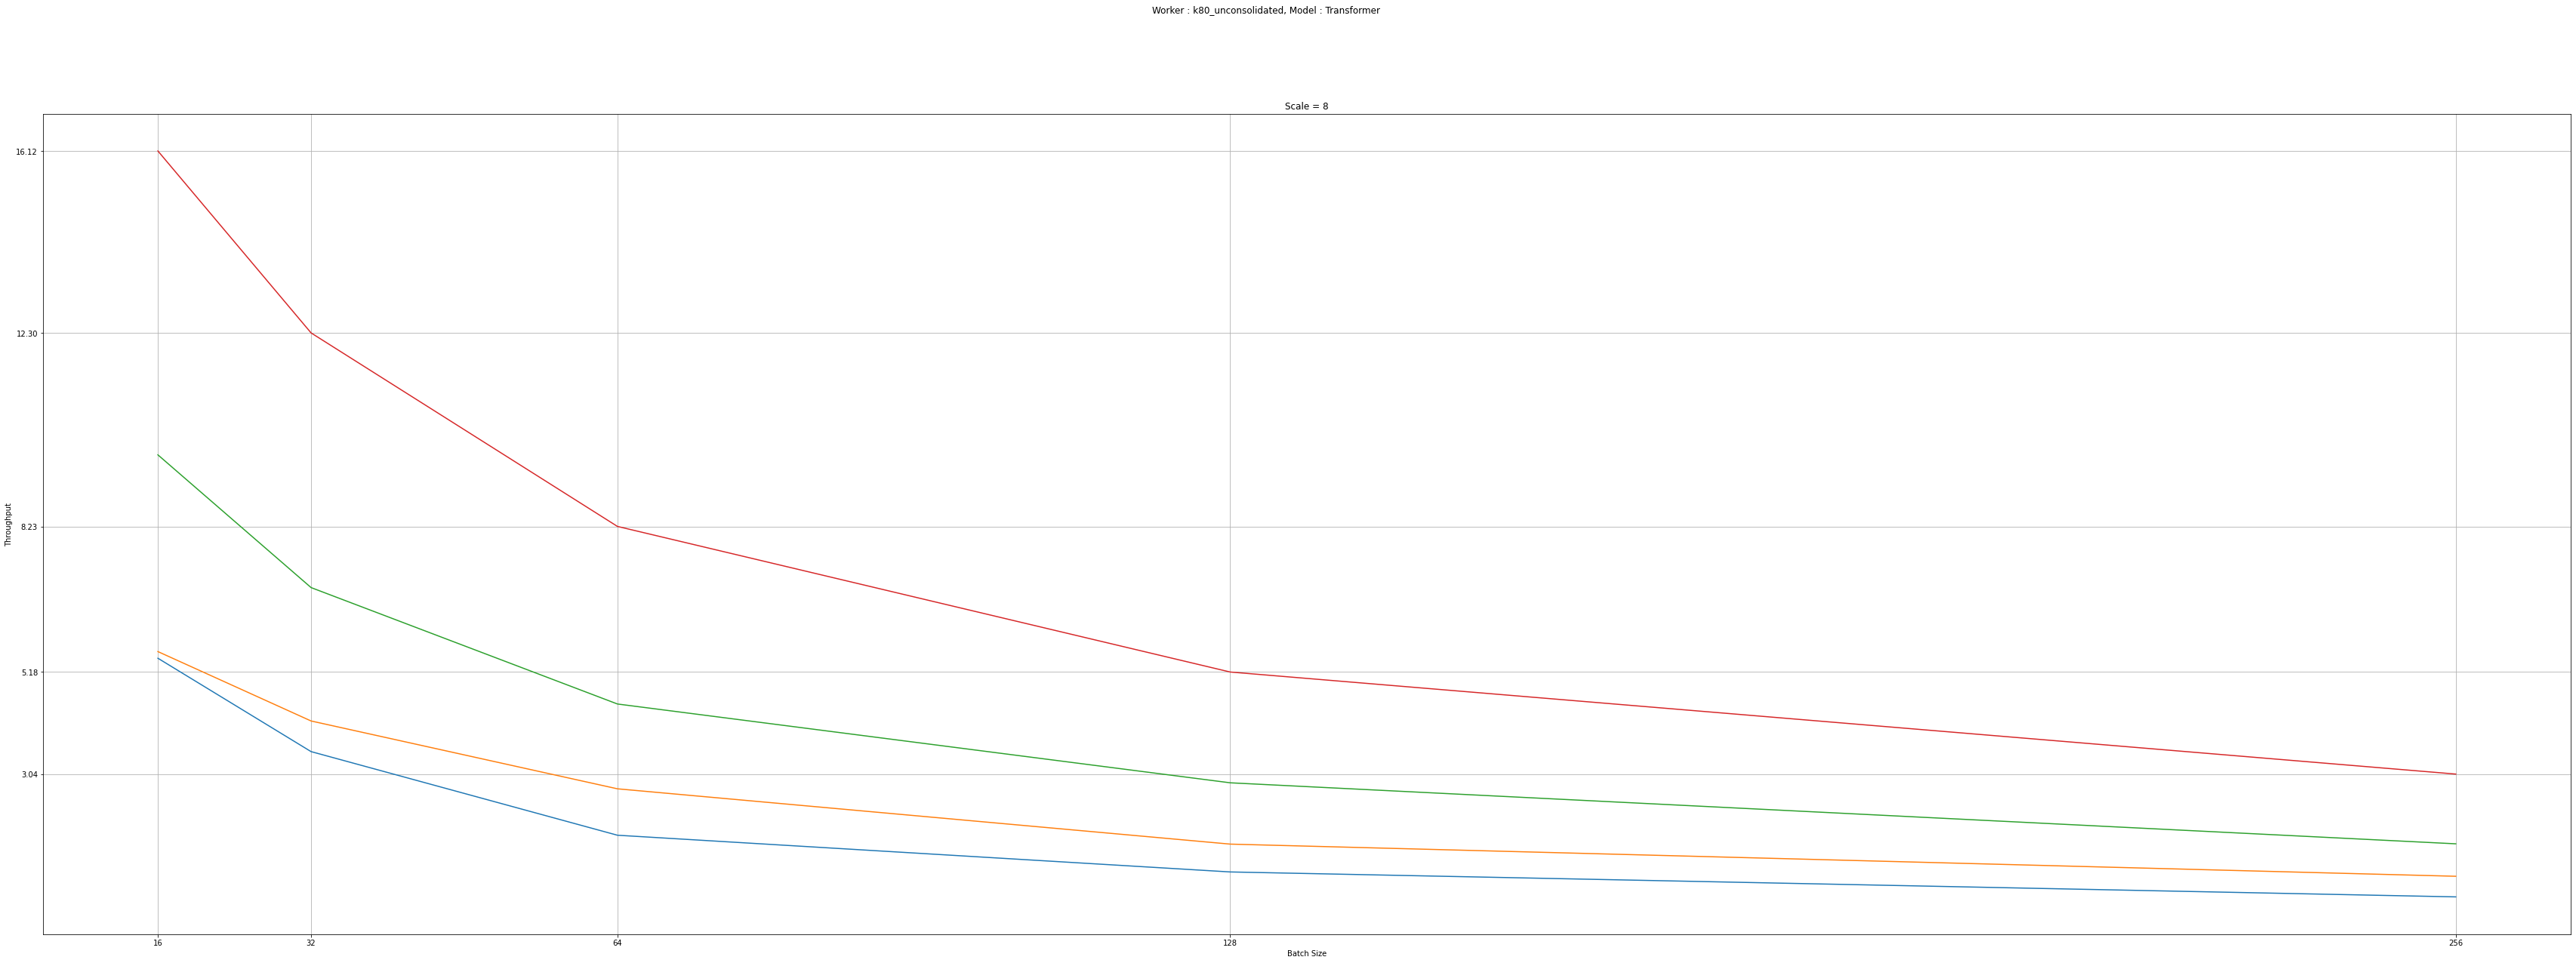

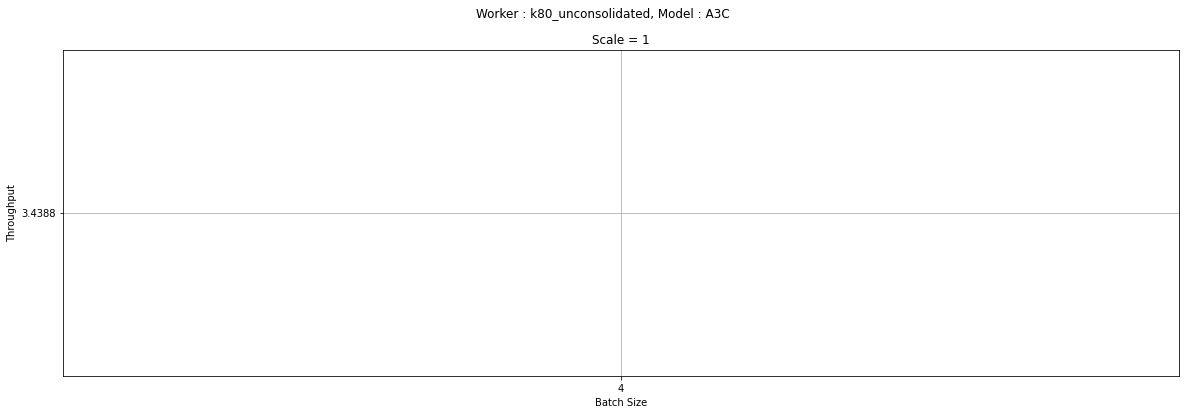

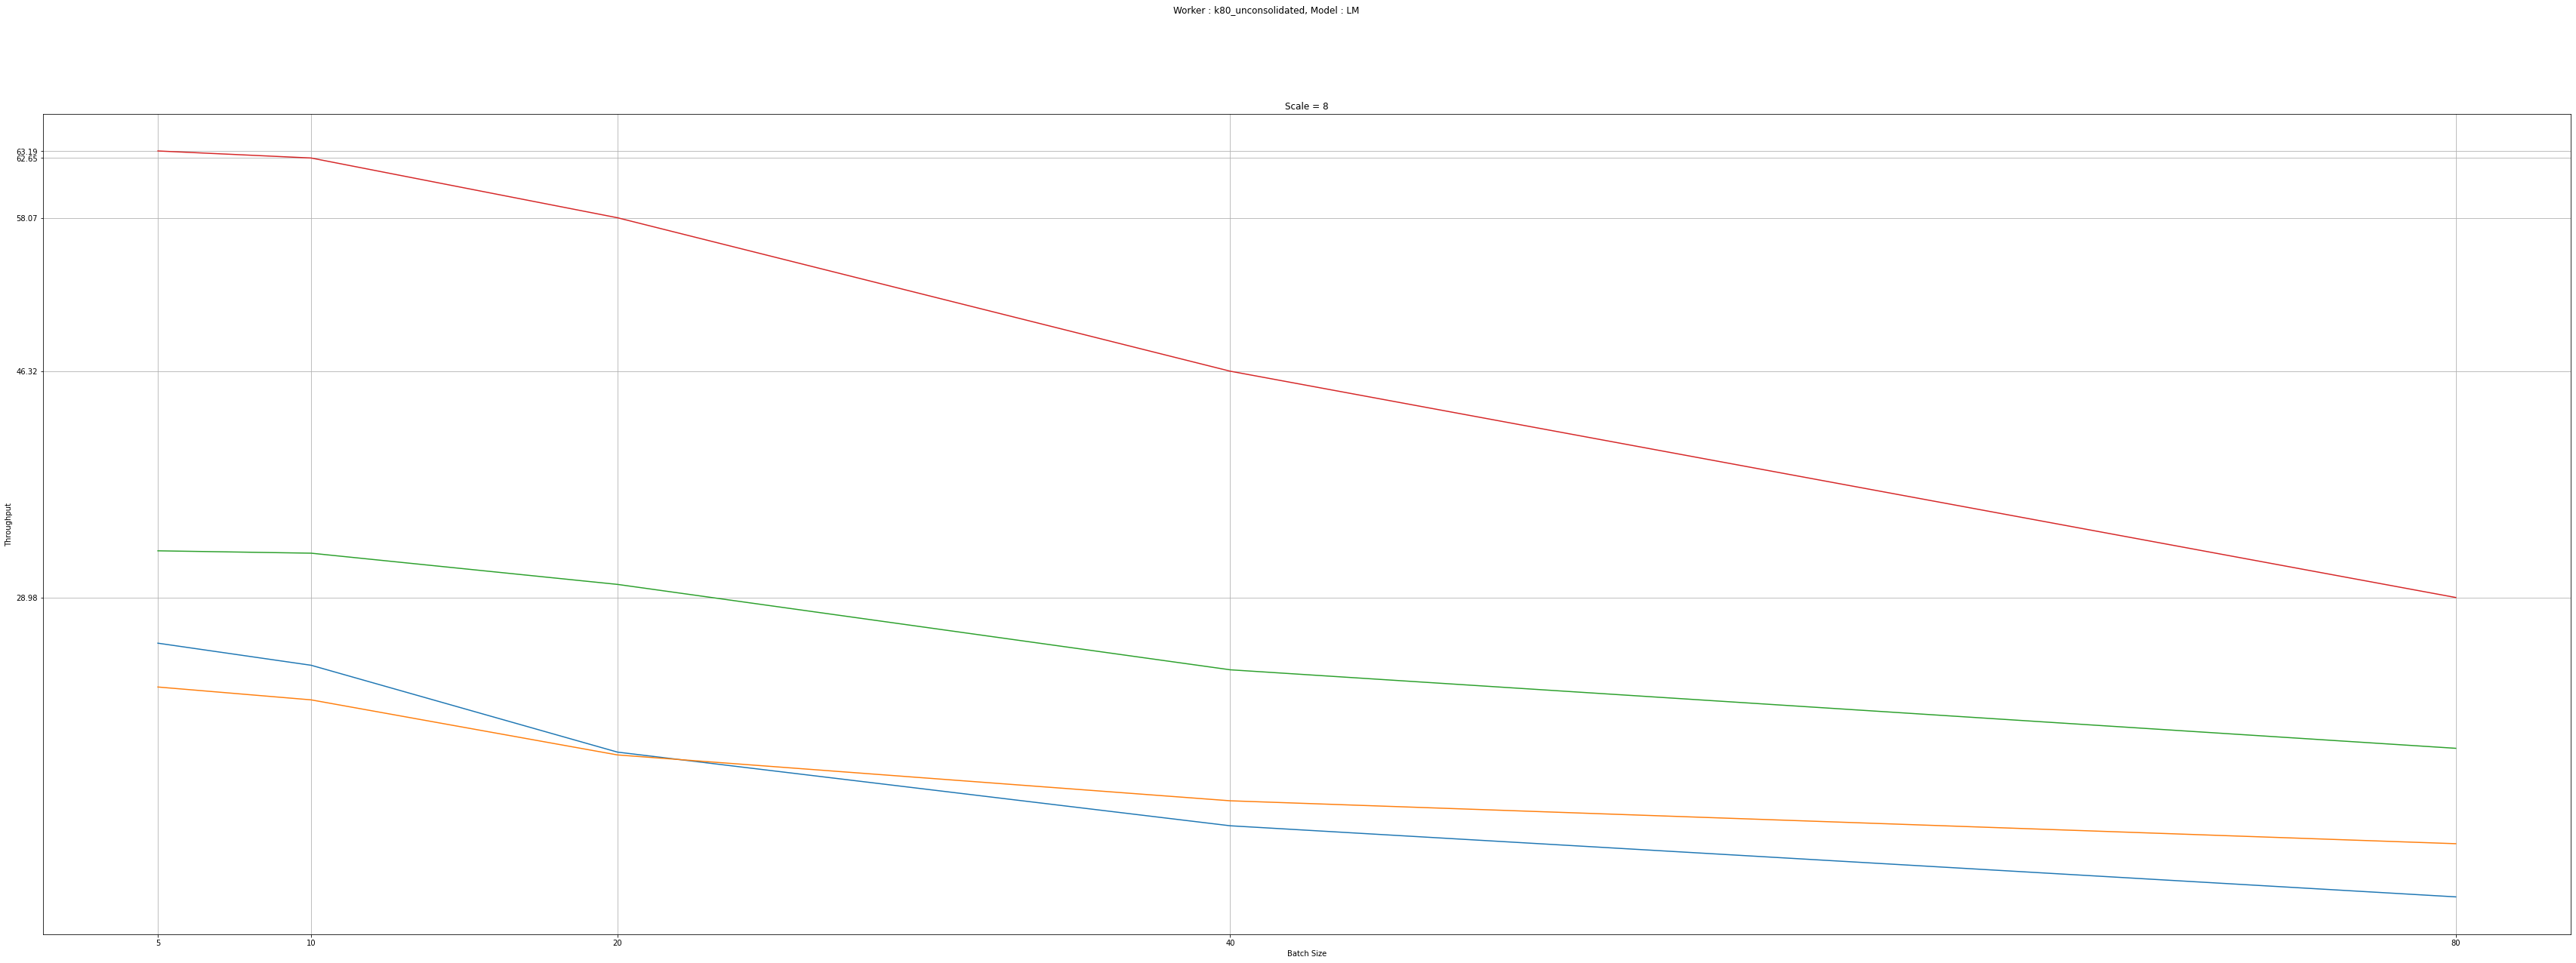

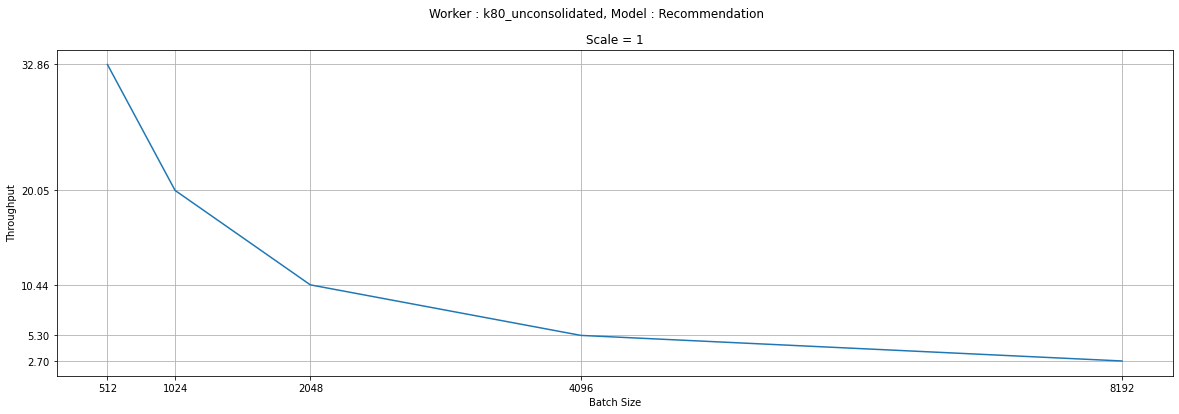

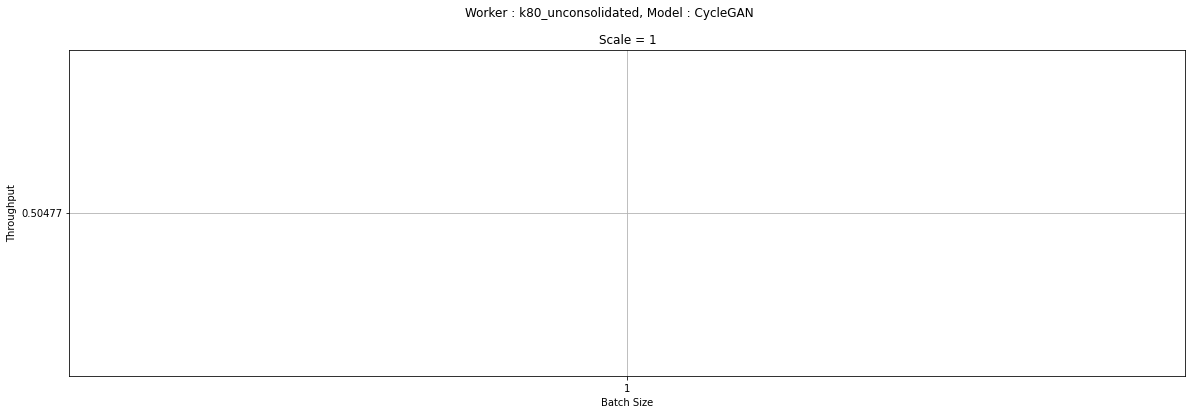

In [72]:
for worker_name in df["worker"].unique():
    for model in df["model1"].unique():    
        result_int = df.query(f'model2 == "x" & model1 == "{model}" & worker == "{worker_name}"')

        no_graphs = len(result_int["scale1"].unique())
        no_rows = no_graphs // 2 + 1 if no_graphs%2 == 1 else no_graphs // 2
        
        if no_graphs == 1 :
            plt.figure(figsize=(20,6))
        else :
            plt.figure(figsize=(60,20))
        plt.suptitle(f'Worker : {worker_name}, Model : {model}')

        for idx, scale in enumerate(result_int["scale1"].unique()):
            result = result_int.query(f'scale1 == {scale}')
            subplot_id = no_rows * 100 + 2 * 10 + (idx + 1)
            
            plt.subplot(subplot_id)
            plt.grid(True)
            plt.xlabel('Batch Size')
            plt.ylabel('Throughput')
            plt.title(f'Scale = {scale}')
            plt.xticks(result["batchsize1"])
            plt.yticks(result["throughput1"])
            plt.plot(result["batchsize1"], result["throughput1"])